In [176]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
raw_seq = pd.read_csv("/content/drive/My Drive/Ontario_Confirmed_Cases.csv")

In [0]:
raw_seq = raw_seq.rename(columns={'Confirmed deaths': 'Ontario Confirmed Deaths', \
                                  'Confirmed Recovered': 'Ontario Recovered'})

In [179]:
raw = raw_seq.iloc[4:]

raw.head()

,Dates,Confirmed Cases,Ontario Confirmed Deaths,Ontario Recovered
4,01/26/2020,1,0,0
5,01/27/2020,1,0,0
6,01/28/2020,1,0,0
7,01/29/2020,1,0,0
8,01/30/2020,1,0,0


In [0]:
ontario_confirmed_cases = raw_seq['Confirmed Cases']
ontario_deaths = raw_seq['Ontario Confirmed Deaths']
ontario_recovered = raw_seq['Ontario Recovered']

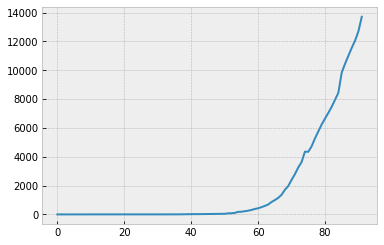

In [181]:
raw_seq['Confirmed Cases'].plot()

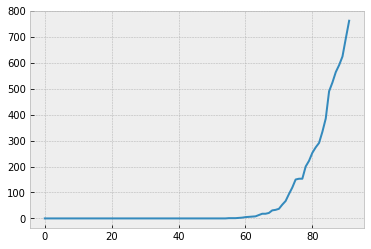

In [182]:
raw_seq['Ontario Confirmed Deaths'].plot()

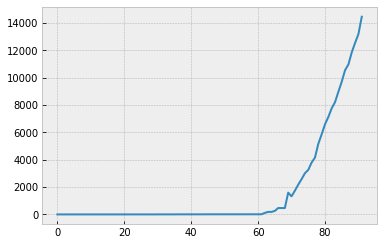

In [183]:
raw_seq['Ontario Recovered'].plot()

In [184]:
# univariate cnn example
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(ontario_confirmed_cases, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(ontario_confirmed_cases)
pred_val = []
for i in range(x):
  i=ontario_confirmed_cases[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 12ms/step
[[1.4927516]]
1/1 [==============================] - 0s 3ms/step
[[1.4927516]]
1/1 [==============================] - 0s 4ms/step
[[1.4927516]]
1/1 [==============================] - 0s 2ms/step
[[1.4927516]]
1/1 [==============================] - 0s 2ms/step
[[2.7966123]]
1/1 [==============================] - 0s 892us/step
[[2.7966123]]
1/1 [==============================] - 0s 2ms/step
[[2.7966123]]
1/1 [==============================] - 0s 2ms/step
[[2.7966123]]
1/1 [==============================] - 0s 2ms/step
[[2.7966123]]
1/1 [==============================] - 0s 512us/step
[[5.51611]]
1/1 [==============================] - 0s 2ms/step
[[5.51611]]
1/1 [==============================] - 0s 488us/step
[[5.51611]]
1/1 [==============================] - 0s 1ms/step
[[5.51611]]
1/1 [==============================] - 0s 745us/step
[[5.51611]]
1/1 [==============================] - 0s 553us/step
[[5.51611]]
1/1 [=====================

In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['Ontario Predicted Cases']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t1 = raw_seq


In [186]:
raw_seq

,Dates,Confirmed Cases,Ontario Confirmed Deaths,Ontario Recovered,Ontario Predicted Cases
0,01/22/2020,0,0,0,1.492752
1,01/23/2020,0,0,0,1.492752
2,01/24/2020,0,0,0,1.492752
3,01/25/2020,0,0,0,1.492752
4,01/26/2020,1,0,0,2.796612
5,01/27/2020,1,0,0,2.796612
6,01/28/2020,1,0,0,2.796612
7,01/29/2020,1,0,0,2.796612
8,01/30/2020,1,0,0,2.796612
9,01/31/2020,3,0,0,5.516110


In [187]:
print(t1)

         Dates  Confirmed Cases  ...  Ontario Recovered  Ontario Predicted Cases
0   01/22/2020                0  ...                  0                 1.492752
1   01/23/2020                0  ...                  0                 1.492752
2   01/24/2020                0  ...                  0                 1.492752
3   01/25/2020                0  ...                  0                 1.492752
4   01/26/2020                1  ...                  0                 2.796612
5   01/27/2020                1  ...                  0                 2.796612
6   01/28/2020                1  ...                  0                 2.796612
7   01/29/2020                1  ...                  0                 2.796612
8   01/30/2020                1  ...                  0                 2.796612
9   01/31/2020                3  ...                  0                 5.516110
10  02/01/2020                3  ...                  0                 5.516110
11  02/02/2020              

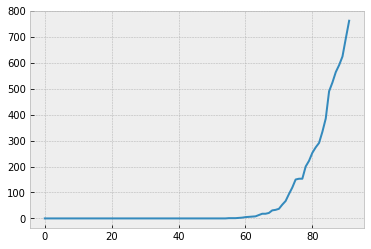

In [188]:
t1['Ontario Confirmed Deaths'].plot()

In [189]:
# Ontario Deaths
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(ontario_deaths, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(ontario_deaths)
pred_val = []
for i in range(x):
  i=ontario_deaths[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 12ms/step
[[2.1228127]]
1/1 [==============================] - 0s 4ms/step
[[2.1228127]]
1/1 [==============================] - 0s 810us/step
[[2.1228127]]
1/1 [==============================] - 0s 2ms/step
[[2.1228127]]
1/1 [==============================] - 0s 1ms/step
[[2.1228127]]
1/1 [==============================] - 0s 2ms/step
[[2.1228127]]
1/1 [==============================] - 0s 768us/step
[[2.1228127]]
1/1 [==============================] - 0s 623us/step
[[2.1228127]]
1/1 [==============================] - 0s 651us/step
[[2.1228127]]
1/1 [==============================] - 0s 652us/step
[[2.1228127]]
1/1 [==============================] - 0s 617us/step
[[2.1228127]]
1/1 [==============================] - 0s 628us/step
[[2.1228127]]
1/1 [==============================] - 0s 869us/step
[[2.1228127]]
1/1 [==============================] - 0s 827us/step
[[2.1228127]]
1/1 [==============================] - 0s 613us/step
[[2.1228127]]
1/1 

In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['Ontario Predicted Deaths']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t2 = raw_seq

In [191]:
print(t2)

         Dates  ...  Ontario Predicted Deaths
0   01/22/2020  ...                  2.122813
1   01/23/2020  ...                  2.122813
2   01/24/2020  ...                  2.122813
3   01/25/2020  ...                  2.122813
4   01/26/2020  ...                  2.122813
5   01/27/2020  ...                  2.122813
6   01/28/2020  ...                  2.122813
7   01/29/2020  ...                  2.122813
8   01/30/2020  ...                  2.122813
9   01/31/2020  ...                  2.122813
10  02/01/2020  ...                  2.122813
11  02/02/2020  ...                  2.122813
12  02/03/2020  ...                  2.122813
13  02/04/2020  ...                  2.122813
14  02/05/2020  ...                  2.122813
15  02/06/2020  ...                  2.122813
16  02/07/2020  ...                  2.122813
17  02/08/2020  ...                  2.122813
18  02/09/2020  ...                  2.122813
19  02/10/2020  ...                  2.122813
20  02/11/2020  ...               

In [192]:
t2.tail(10)

,Dates,Confirmed Cases,Ontario Confirmed Deaths,Ontario Recovered,Ontario Predicted Cases,Ontario Predicted Deaths
82,04/13/2020,7470,291,7758,7961.475098,319.250916
83,04/14/2020,7953,334,8210,8475.228516,365.007751
84,04/15/2020,8447,385,8966,9000.684570,419.277496
85,04/16/2020,9840,490,9698,10482.382812,531.009338
86,04/17/2020,10456,524,10545,11137.605469,567.189209
87,04/18/2020,11013,564,10964,11730.072266,609.753662
88,04/19/2020,11561,591,11847,12312.966797,638.484741
89,04/20/2020,12063,624,12543,12846.932617,673.600342
90,04/21/2020,12715,694,13188,13540.446289,748.088257
91,04/22/2020,13718,762,14454,14607.310547,820.447998


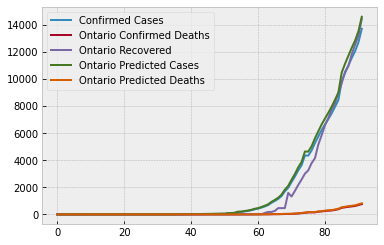

In [193]:
t2.plot()

In [194]:
# Ontario Recovered
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(ontario_recovered, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(ontario_recovered)
pred_val = []
for i in range(x):
  i=ontario_recovered[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 12ms/step
[[3.5058122]]
1/1 [==============================] - 0s 968us/step
[[3.5058122]]
1/1 [==============================] - 0s 3ms/step
[[3.5058122]]
1/1 [==============================] - 0s 2ms/step
[[3.5058122]]
1/1 [==============================] - 0s 1ms/step
[[3.5058122]]
1/1 [==============================] - 0s 885us/step
[[3.5058122]]
1/1 [==============================] - 0s 1ms/step
[[3.5058122]]
1/1 [==============================] - 0s 1ms/step
[[3.5058122]]
1/1 [==============================] - 0s 907us/step
[[3.5058122]]
1/1 [==============================] - 0s 973us/step
[[3.5058122]]
1/1 [==============================] - 0s 1ms/step
[[3.5058122]]
1/1 [==============================] - 0s 1ms/step
[[3.5058122]]
1/1 [==============================] - 0s 957us/step
[[3.5058122]]
1/1 [==============================] - 0s 947us/step
[[3.5058122]]
1/1 [==============================] - 0s 904us/step
[[3.5058122]]
1/1 [=====

In [0]:
pred_val
predict= np.concatenate(pred_val)
Predict_cases=pd.DataFrame(predict)
Predict_cases['Ontario Predicted Recovered']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t3 = raw_seq

In [196]:
raw_seq

,Dates,Confirmed Cases,Ontario Confirmed Deaths,Ontario Recovered,Ontario Predicted Cases,Ontario Predicted Deaths,Ontario Predicted Recovered
0,01/22/2020,0,0,0,1.492752,2.122813,3.505812
1,01/23/2020,0,0,0,1.492752,2.122813,3.505812
2,01/24/2020,0,0,0,1.492752,2.122813,3.505812
3,01/25/2020,0,0,0,1.492752,2.122813,3.505812
4,01/26/2020,1,0,0,2.796612,2.122813,3.505812
5,01/27/2020,1,0,0,2.796612,2.122813,3.505812
6,01/28/2020,1,0,0,2.796612,2.122813,3.505812
7,01/29/2020,1,0,0,2.796612,2.122813,3.505812
8,01/30/2020,1,0,0,2.796612,2.122813,3.505812
9,01/31/2020,3,0,0,5.516110,2.122813,3.505812


In [197]:
print(t3)

         Dates  ...  Ontario Predicted Recovered
0   01/22/2020  ...                     3.505812
1   01/23/2020  ...                     3.505812
2   01/24/2020  ...                     3.505812
3   01/25/2020  ...                     3.505812
4   01/26/2020  ...                     3.505812
5   01/27/2020  ...                     3.505812
6   01/28/2020  ...                     3.505812
7   01/29/2020  ...                     3.505812
8   01/30/2020  ...                     3.505812
9   01/31/2020  ...                     3.505812
10  02/01/2020  ...                     3.505812
11  02/02/2020  ...                     3.505812
12  02/03/2020  ...                     3.505812
13  02/04/2020  ...                     3.505812
14  02/05/2020  ...                     3.505812
15  02/06/2020  ...                     3.505812
16  02/07/2020  ...                     3.505812
17  02/08/2020  ...                     3.505812
18  02/09/2020  ...                     3.505812
19  02/10/2020  ... 

In [198]:
t3.tail(10)

,Dates,Confirmed Cases,Ontario Confirmed Deaths,Ontario Recovered,Ontario Predicted Cases,Ontario Predicted Deaths,Ontario Predicted Recovered
82,04/13/2020,7470,291,7758,7961.475098,319.250916,8677.188477
83,04/14/2020,7953,334,8210,8475.228516,365.007751,9181.599609
84,04/15/2020,8447,385,8966,9000.684570,419.277496,10025.261719
85,04/16/2020,9840,490,9698,10482.382812,531.009338,10842.140625
86,04/17/2020,10456,524,10545,11137.605469,567.189209,11787.355469
87,04/18/2020,11013,564,10964,11730.072266,609.753662,12254.939453
88,04/19/2020,11561,591,11847,12312.966797,638.484741,13240.329102
89,04/20/2020,12063,624,12543,12846.932617,673.600342,14017.033203
90,04/21/2020,12715,694,13188,13540.446289,748.088257,14736.825195
91,04/22/2020,13718,762,14454,14607.310547,820.447998,16149.627930


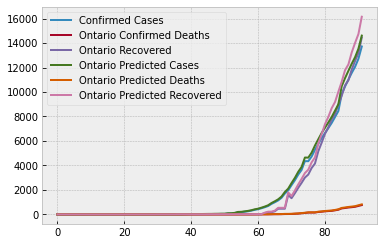

In [199]:
t3.plot()

In [0]:
t3.to_csv (r'/content/drive/My Drive/ontario_og_preds.csv')

In [201]:
from sklearn.metrics import r2_score
score = r2_score(t3['Confirmed Cases'], t3['Ontario Predicted Cases'])
print(score)
a= score

0.9944308114381984


In [202]:
from sklearn.metrics import r2_score
score = r2_score(t3['Ontario Recovered'], t3['Ontario Predicted Recovered'])
print(score)
b= score

0.9827575615434627


In [203]:
from sklearn.metrics import r2_score
score = r2_score(t3['Ontario Confirmed Deaths'], t3['Ontario Predicted Deaths'])
print(score)
c = score

0.99081810338371


In [204]:
Average_r2score_ondataset = (a + b + c)/3
print(Average_r2score_ondataset)

0.9893354921217904


In [205]:
pd.set_option('display.max_rows', t3.shape[0]+1)
print(t3)

         Dates  ...  Ontario Predicted Recovered
0   01/22/2020  ...                     3.505812
1   01/23/2020  ...                     3.505812
2   01/24/2020  ...                     3.505812
3   01/25/2020  ...                     3.505812
4   01/26/2020  ...                     3.505812
5   01/27/2020  ...                     3.505812
6   01/28/2020  ...                     3.505812
7   01/29/2020  ...                     3.505812
8   01/30/2020  ...                     3.505812
9   01/31/2020  ...                     3.505812
10  02/01/2020  ...                     3.505812
11  02/02/2020  ...                     3.505812
12  02/03/2020  ...                     3.505812
13  02/04/2020  ...                     3.505812
14  02/05/2020  ...                     3.505812
15  02/06/2020  ...                     3.505812
16  02/07/2020  ...                     3.505812
17  02/08/2020  ...                     3.505812
18  02/09/2020  ...                     3.505812
19  02/10/2020  ... 

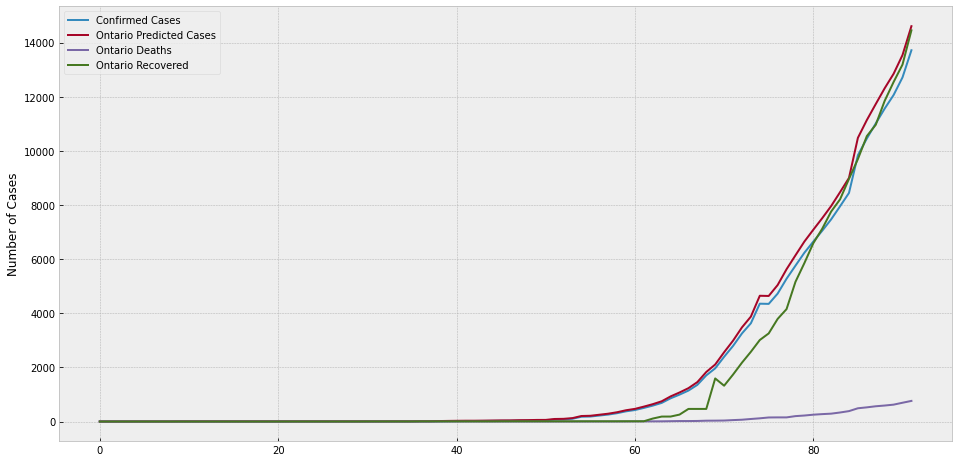

In [206]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
plt.plot(t3['Confirmed Cases'])
plt.plot(t3['Ontario Predicted Cases'])
plt.plot(t3['Ontario Confirmed Deaths'])
#plt.plot(t3['Predicted Deaths'])
plt.plot(t3['Ontario Recovered'])
#plt.plot(t3['Predicted Recovered'])
plt.legend(['Confirmed Cases', 'Ontario Predicted Cases', 'Ontario Deaths', 'Ontario Recovered'], loc='upper left')
plt.show()

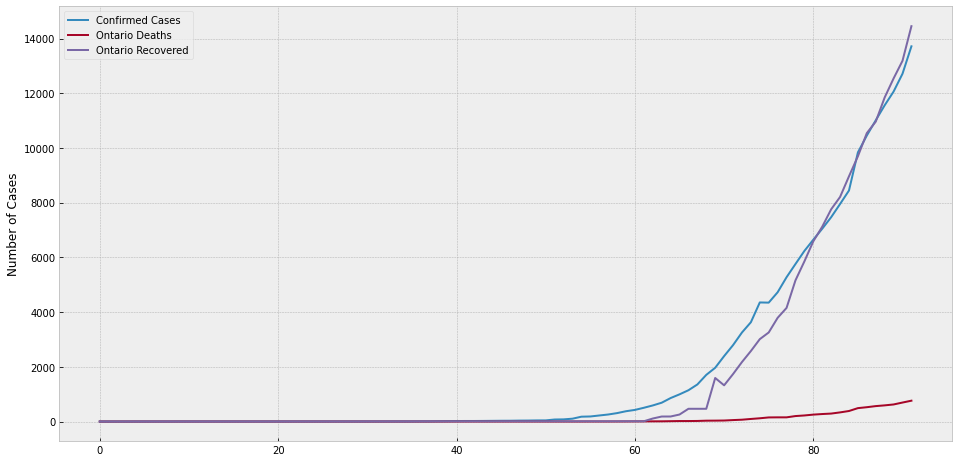

In [207]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
plt.plot(t3['Confirmed Cases'])
#plt.plot(raw_seq['Predicted Cases'])
plt.plot(t3['Ontario Confirmed Deaths'])#plt.plot(raw_seq['Predicted Deaths'])
plt.plot(t3['Ontario Recovered'])
#plt.plot(raw_seq['Predicted Recovered'])
plt.legend(['Confirmed Cases', 'Ontario Deaths', 'Ontario Recovered'], loc='upper left')
plt.show()

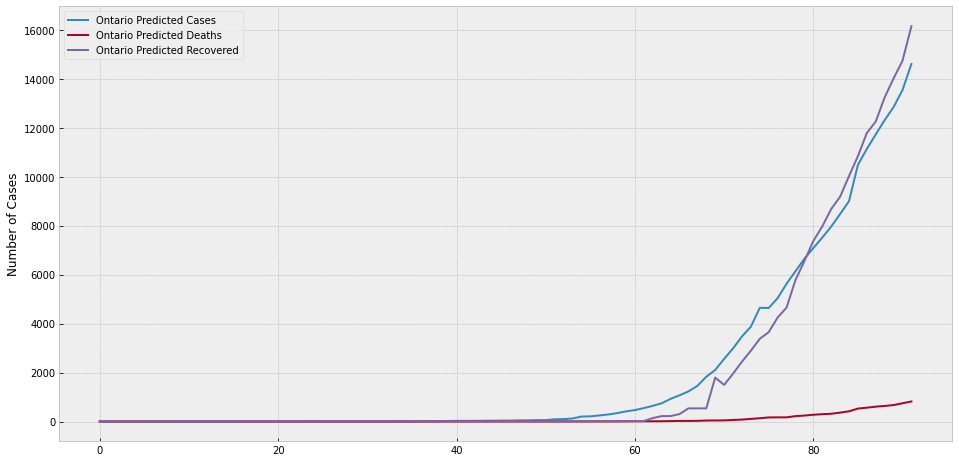

In [208]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
#plt.plot(raw_seq['India Confirmed Cases'])
plt.plot(t3['Ontario Predicted Cases'])
#plt.plot(raw_seq['India Deaths'])
plt.plot(t3['Ontario Predicted Deaths'])
#plt.plot(raw_seq['India Recovered'])
plt.plot(t3['Ontario Predicted Recovered'])
plt.legend(['Ontario Predicted Cases', 'Ontario Predicted Deaths', 'Ontario Predicted Recovered'], loc='upper left')
plt.show()

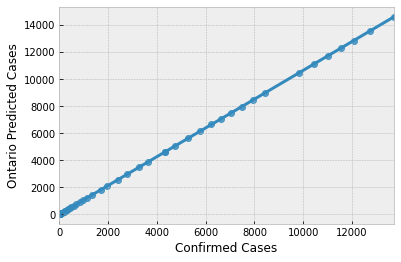

In [209]:
import seaborn as sns
sns.regplot(t3['Confirmed Cases'], t3['Ontario Predicted Cases'])


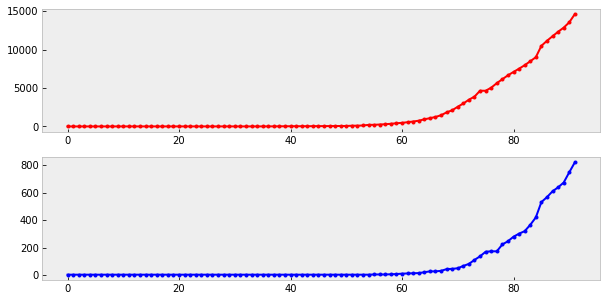

In [210]:
aj = t3['Ontario Predicted Cases']
jk = t3['Ontario Predicted Deaths']
lm = t3['Ontario Predicted Recovered']
lp = t3['Confirmed Cases']
lt = t3['Ontario Recovered']
lx = t3['Ontario Confirmed Deaths']
fig = plt.figure()
fig.set_size_inches(10,5)
ax1 = fig.add_subplot(211)
line1 = ax1.plot(aj,marker='.',color='red',label=" Ontario Predicted Cases")
ax2 = fig.add_subplot(212)
line2 = ax2.plot(jk,marker='.',color='blue',label="Ontario Predicted Deaths")
ax1.grid()
ax2.grid()
plt.show()

In [211]:
import altair as alt

alt.Chart(t3).mark_point().encode(
    x='Dates',
    y='Ontario Predicted Cases',
    color='Confirmed Cases',
).interactive()

alt.Chart(...)

In [212]:
import altair as alt

alt.Chart(t3).mark_point().encode(
    x='Dates',
    y='Ontario Predicted Deaths',
    color='Ontario Confirmed Deaths',
).interactive()

alt.Chart(...)

In [213]:
import altair as alt

alt.Chart(t3).mark_point().encode(
    x='Dates',
    y='Ontario Predicted Recovered',
    color='Ontario Recovered',
).interactive()

alt.Chart(...)

In [0]:
import pandas as pd
raw_seq = pd.read_csv("/content/drive/My Drive/new_combinedhebei (1) (1).csv")

In [0]:
raw_seq = raw_seq.rename(columns={'Confirmed Cases': 'Hebei Confirmed Cases', \
                                  'Deaths': 'Hebei Deaths', \
                                  'Recovered': 'Hebei Recovered'})

In [216]:
raw = raw_seq.iloc[4:]

raw.head()

,Dates,Hebei Confirmed Cases,Hebei Deaths,Hebei Recovered
4,01/26/2020,13,1,0
5,01/27/2020,18,1,0
6,01/28/2020,33,1,0
7,01/29/2020,48,1,0
8,01/30/2020,65,1,0


In [0]:
hebei_confirmed_cases = raw_seq['Hebei Confirmed Cases']
hebei_deaths = raw_seq['Hebei Deaths']
hebei_recovered = raw_seq['Hebei Recovered']

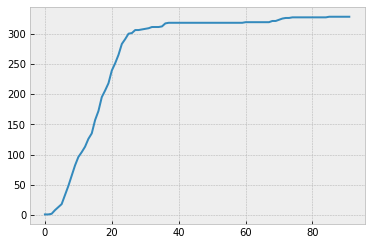

In [218]:
raw_seq['Hebei Confirmed Cases'].plot()

In [219]:
# univariate cnn example
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(hebei_confirmed_cases, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(hebei_confirmed_cases)
pred_val = []
for i in range(x):
  i=hebei_confirmed_cases[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 10ms/step
[[9.353031]]
1/1 [==============================] - 0s 924us/step
[[9.353031]]
1/1 [==============================] - 0s 1ms/step
[[10.386899]]
1/1 [==============================] - 0s 701us/step
[[16.450228]]
1/1 [==============================] - 0s 2ms/step
[[21.39266]]
1/1 [==============================] - 0s 2ms/step
[[26.298172]]
1/1 [==============================] - 0s 725us/step
[[41.0147]]
1/1 [==============================] - 0s 668us/step
[[55.72464]]
1/1 [==============================] - 0s 686us/step
[[72.277115]]
1/1 [==============================] - 0s 677us/step
[[88.82867]]
1/1 [==============================] - 0s 782us/step
[[102.459335]]
1/1 [==============================] - 0s 3ms/step
[[110.24829]]
1/1 [==============================] - 0s 753us/step
[[119.01087]]
1/1 [==============================] - 0s 926us/step
[[131.66797]]
1/1 [==============================] - 0s 2ms/step
[[140.43054]]
1/1 [=======

In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['Hebei Predicted Cases']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t1 = raw_seq


In [221]:
print(t1)

         Dates  Hebei Confirmed Cases  ...  Hebei Recovered  Hebei Predicted Cases
0   01/22/2020                      1  ...                0               9.353031
1   01/23/2020                      1  ...                0               9.353031
2   01/24/2020                      2  ...                0              10.386899
3   01/25/2020                      8  ...                0              16.450228
4   01/26/2020                     13  ...                0              21.392660
5   01/27/2020                     18  ...                0              26.298172
6   01/28/2020                     33  ...                0              41.014702
7   01/29/2020                     48  ...                0              55.724640
8   01/30/2020                     65  ...                0              72.277115
9   01/31/2020                     82  ...                0              88.828667
10  02/01/2020                     96  ...                0             102.459335
11  

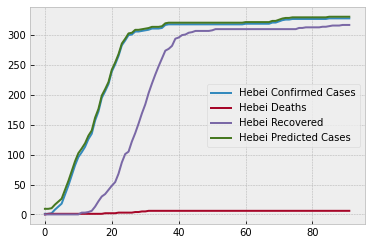

In [222]:
t1.plot()

In [223]:
# Hebei Deaths
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(hebei_deaths, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(hebei_deaths)
pred_val = []
for i in range(x):
  i=hebei_deaths[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 12ms/step
[[1.4754893]]
1/1 [==============================] - 0s 3ms/step
[[2.66121]]
1/1 [==============================] - 0s 4ms/step
[[2.66121]]
1/1 [==============================] - 0s 3ms/step
[[2.66121]]
1/1 [==============================] - 0s 3ms/step
[[2.66121]]
1/1 [==============================] - 0s 525us/step
[[2.66121]]
1/1 [==============================] - 0s 803us/step
[[2.66121]]
1/1 [==============================] - 0s 616us/step
[[2.66121]]
1/1 [==============================] - 0s 671us/step
[[2.66121]]
1/1 [==============================] - 0s 1ms/step
[[2.66121]]
1/1 [==============================] - 0s 2ms/step
[[2.66121]]
1/1 [==============================] - 0s 715us/step
[[2.66121]]
1/1 [==============================] - 0s 2ms/step
[[2.66121]]
1/1 [==============================] - 0s 598us/step
[[2.66121]]
1/1 [==============================] - 0s 714us/step
[[2.66121]]
1/1 [==============================] -

In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['Hebei Predicted Deaths']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t2 = raw_seq

In [225]:
print(t2)

         Dates  ...  Hebei Predicted Deaths
0   01/22/2020  ...                1.475489
1   01/23/2020  ...                2.661210
2   01/24/2020  ...                2.661210
3   01/25/2020  ...                2.661210
4   01/26/2020  ...                2.661210
5   01/27/2020  ...                2.661210
6   01/28/2020  ...                2.661210
7   01/29/2020  ...                2.661210
8   01/30/2020  ...                2.661210
9   01/31/2020  ...                2.661210
10  02/01/2020  ...                2.661210
11  02/02/2020  ...                2.661210
12  02/03/2020  ...                2.661210
13  02/04/2020  ...                2.661210
14  02/05/2020  ...                2.661210
15  02/06/2020  ...                2.661210
16  02/07/2020  ...                2.661210
17  02/08/2020  ...                2.661210
18  02/09/2020  ...                3.881549
19  02/10/2020  ...                3.881549
20  02/11/2020  ...                3.881549
21  02/12/2020  ...             

In [226]:
t2.tail(10)

,Dates,Hebei Confirmed Cases,Hebei Deaths,Hebei Recovered,Hebei Predicted Cases,Hebei Predicted Deaths
82,04/13/2020,327,6,313,329.741638,7.652678
83,04/14/2020,327,6,314,329.741638,7.652678
84,04/15/2020,327,6,314,329.741638,7.652678
85,04/16/2020,328,6,315,330.736786,7.652678
86,04/17/2020,328,6,316,330.736786,7.652678
87,04/18/2020,328,6,316,330.736786,7.652678
88,04/19/2020,328,6,316,330.736786,7.652678
89,04/20/2020,328,6,317,330.736786,7.652678
90,04/21/2020,328,6,317,330.736786,7.652678
91,04/22/2020,328,6,317,330.736786,7.652678


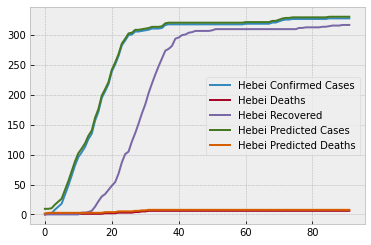

In [227]:
t2.plot()

In [228]:
# Hebei Recovered
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(hebei_recovered, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(hebei_recovered)
pred_val = []
for i in range(x):
  i=hebei_recovered[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 11ms/step
[[3.1869562]]
1/1 [==============================] - 0s 1ms/step
[[3.1869562]]
1/1 [==============================] - 0s 2ms/step
[[3.1869562]]
1/1 [==============================] - 0s 3ms/step
[[3.1869562]]
1/1 [==============================] - 0s 2ms/step
[[3.1869562]]
1/1 [==============================] - 0s 1ms/step
[[3.1869562]]
1/1 [==============================] - 0s 700us/step
[[3.1869562]]
1/1 [==============================] - 0s 2ms/step
[[3.1869562]]
1/1 [==============================] - 0s 1ms/step
[[3.1869562]]
1/1 [==============================] - 0s 822us/step
[[3.1869562]]
1/1 [==============================] - 0s 1ms/step
[[3.1869562]]
1/1 [==============================] - 0s 993us/step
[[9.110836]]
1/1 [==============================] - 0s 1ms/step
[[9.110836]]
1/1 [==============================] - 0s 829us/step
[[10.448525]]
1/1 [==============================] - 0s 907us/step
[[13.1008005]]
1/1 [==========

In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['Hebei Predicted Recovered']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t31 = raw_seq

In [230]:
print(t31)

         Dates  ...  Hebei Predicted Recovered
0   01/22/2020  ...                   3.186956
1   01/23/2020  ...                   3.186956
2   01/24/2020  ...                   3.186956
3   01/25/2020  ...                   3.186956
4   01/26/2020  ...                   3.186956
5   01/27/2020  ...                   3.186956
6   01/28/2020  ...                   3.186956
7   01/29/2020  ...                   3.186956
8   01/30/2020  ...                   3.186956
9   01/31/2020  ...                   3.186956
10  02/01/2020  ...                   3.186956
11  02/02/2020  ...                   9.110836
12  02/03/2020  ...                   9.110836
13  02/04/2020  ...                  10.448525
14  02/05/2020  ...                  13.100801
15  02/06/2020  ...                  20.705605
16  02/07/2020  ...                  29.523870
17  02/08/2020  ...                  37.167198
18  02/09/2020  ...                  40.988850
19  02/10/2020  ...                  47.659702
20  02/11/202

In [231]:
t31.tail(10)

,Dates,Hebei Confirmed Cases,Hebei Deaths,Hebei Recovered,Hebei Predicted Cases,Hebei Predicted Deaths,Hebei Predicted Recovered
82,04/13/2020,327,6,313,329.741638,7.652678,314.637512
83,04/14/2020,327,6,314,329.741638,7.652678,315.629822
84,04/15/2020,327,6,314,329.741638,7.652678,315.629822
85,04/16/2020,328,6,315,330.736786,7.652678,316.622192
86,04/17/2020,328,6,316,330.736786,7.652678,317.614594
87,04/18/2020,328,6,316,330.736786,7.652678,317.614594
88,04/19/2020,328,6,316,330.736786,7.652678,317.614594
89,04/20/2020,328,6,317,330.736786,7.652678,318.606934
90,04/21/2020,328,6,317,330.736786,7.652678,318.606934
91,04/22/2020,328,6,317,330.736786,7.652678,318.606934


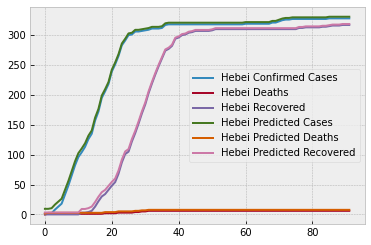

In [232]:
t31.plot()

In [0]:
t31.to_csv (r'/content/drive/My Drive/hebei_og_preds.csv', index = False, header=True)

In [234]:
'''errors= abs(Total_cases['Prediction'] - raw['India Confirmed Cases'])
mape= np.mean(100*(errors/confirmed_cases))
Accuracy=100-mape
Accuracy'''

"errors= abs(Total_cases['Prediction'] - raw['India Confirmed Cases'])\nmape= np.mean(100*(errors/confirmed_cases))\nAccuracy=100-mape\nAccuracy"

In [235]:
pd.set_option('display.max_rows', t31.shape[0]+1)
print(t31)

         Dates  ...  Hebei Predicted Recovered
0   01/22/2020  ...                   3.186956
1   01/23/2020  ...                   3.186956
2   01/24/2020  ...                   3.186956
3   01/25/2020  ...                   3.186956
4   01/26/2020  ...                   3.186956
5   01/27/2020  ...                   3.186956
6   01/28/2020  ...                   3.186956
7   01/29/2020  ...                   3.186956
8   01/30/2020  ...                   3.186956
9   01/31/2020  ...                   3.186956
10  02/01/2020  ...                   3.186956
11  02/02/2020  ...                   9.110836
12  02/03/2020  ...                   9.110836
13  02/04/2020  ...                  10.448525
14  02/05/2020  ...                  13.100801
15  02/06/2020  ...                  20.705605
16  02/07/2020  ...                  29.523870
17  02/08/2020  ...                  37.167198
18  02/09/2020  ...                  40.988850
19  02/10/2020  ...                  47.659702
20  02/11/202

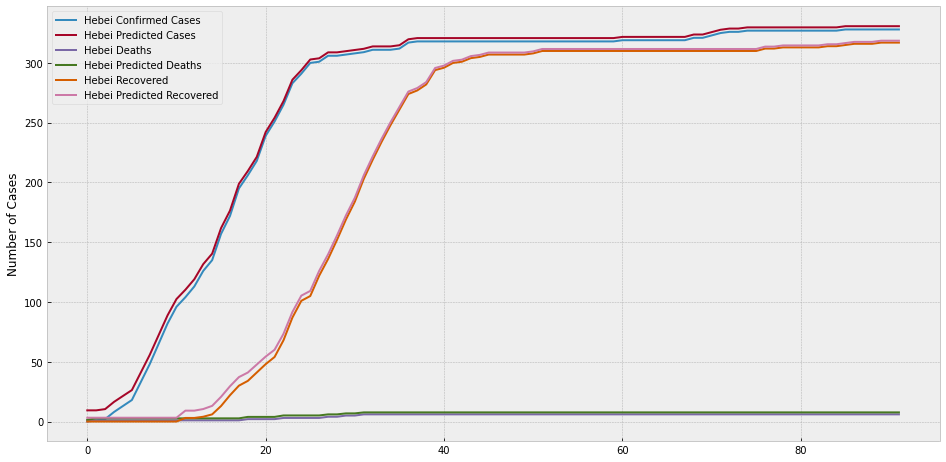

In [236]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
plt.plot(t31['Hebei Confirmed Cases'])
plt.plot(t31['Hebei Predicted Cases'])
plt.plot(t31['Hebei Deaths'])
plt.plot(t31['Hebei Predicted Deaths'])
plt.plot(t31['Hebei Recovered'])
plt.plot(t31['Hebei Predicted Recovered'])
plt.legend(['Hebei Confirmed Cases', 'Hebei Predicted Cases', 'Hebei Deaths', 'Hebei Predicted Deaths', 'Hebei Recovered', 'Hebei Predicted Recovered'], loc='upper left')
plt.show()

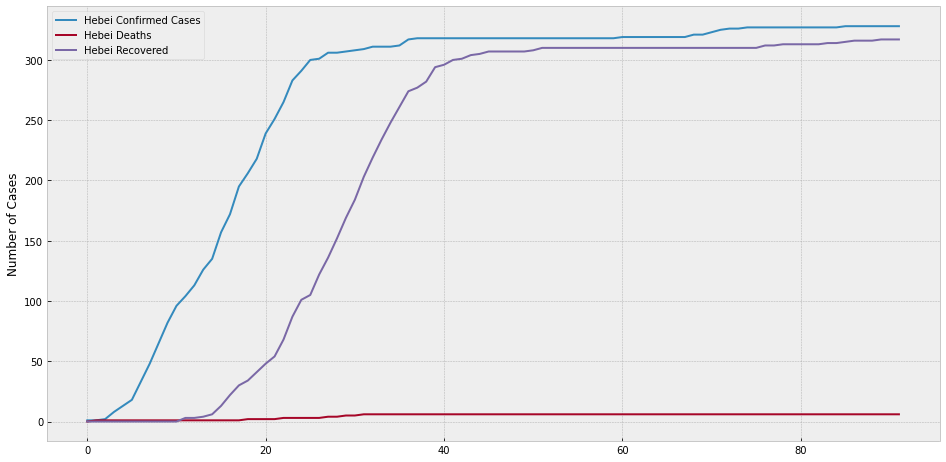

In [237]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
plt.plot(t31['Hebei Confirmed Cases'])
#plt.plot(raw_seq['Predicted Cases'])
plt.plot(t31['Hebei Deaths'])#plt.plot(raw_seq['Predicted Deaths'])
plt.plot(t31['Hebei Recovered'])
#plt.plot(raw_seq['Predicted Recovered'])
plt.legend(['Hebei Confirmed Cases', 'Hebei Deaths', 'Hebei Recovered'], loc='upper left')
plt.show()

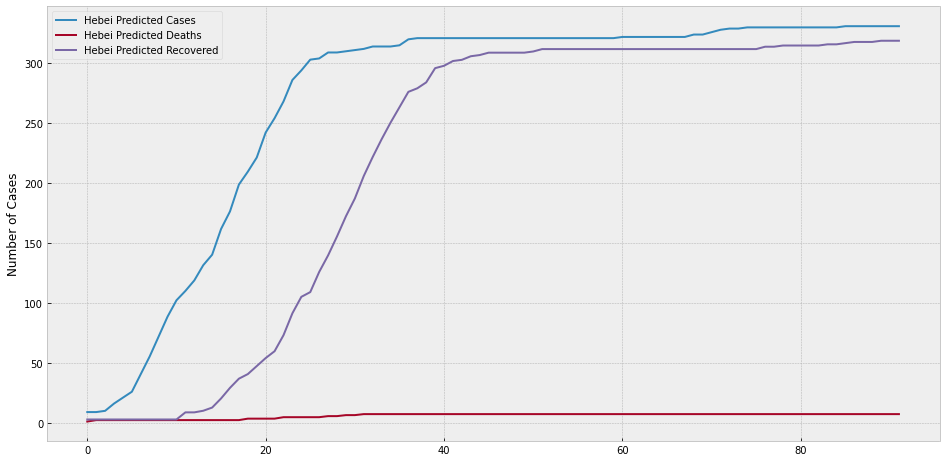

In [238]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
#plt.plot(raw_seq['India Confirmed Cases'])
plt.plot(t31['Hebei Predicted Cases'])
#plt.plot(raw_seq['India Deaths'])
plt.plot(t31['Hebei Predicted Deaths'])
#plt.plot(raw_seq['India Recovered'])
plt.plot(t31['Hebei Predicted Recovered'])
plt.legend(['Hebei Predicted Cases', 'Hebei Predicted Deaths', 'Hebei Predicted Recovered'], loc='upper left')
plt.show()

In [0]:
t41 = t31.pop('Dates')

In [0]:
ab = t3.join(t31)

In [0]:
ab.to_csv("/content/drive/My Drive/totaldata.csv")

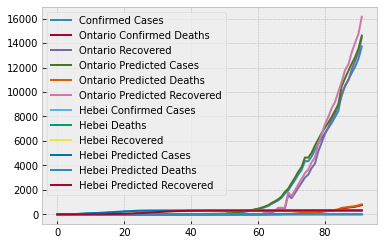

In [242]:
ab.plot()

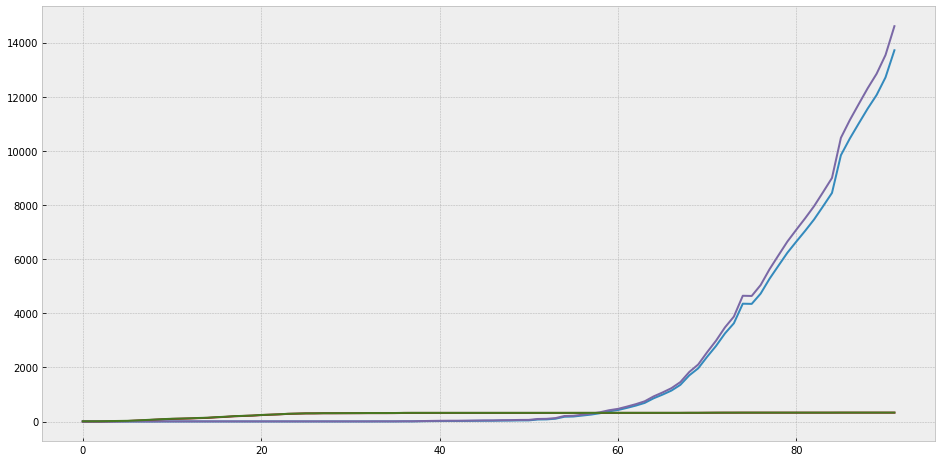

In [243]:
plt.figure(figsize=(16,8))
plt.plot(ab['Confirmed Cases'])
plt.plot(ab['Hebei Confirmed Cases'])
plt.plot(ab['Ontario Predicted Cases'])
plt.plot(ab['Hebei Predicted Cases'])
plt.show()

In [244]:
ab

,Dates,Confirmed Cases,Ontario Confirmed Deaths,Ontario Recovered,Ontario Predicted Cases,Ontario Predicted Deaths,Ontario Predicted Recovered,Hebei Confirmed Cases,Hebei Deaths,Hebei Recovered,Hebei Predicted Cases,Hebei Predicted Deaths,Hebei Predicted Recovered
0,01/22/2020,0,0,0,1.492752,2.122813,3.505812,1,0,0,9.353031,1.475489,3.186956
1,01/23/2020,0,0,0,1.492752,2.122813,3.505812,1,1,0,9.353031,2.661210,3.186956
2,01/24/2020,0,0,0,1.492752,2.122813,3.505812,2,1,0,10.386899,2.661210,3.186956
3,01/25/2020,0,0,0,1.492752,2.122813,3.505812,8,1,0,16.450228,2.661210,3.186956
4,01/26/2020,1,0,0,2.796612,2.122813,3.505812,13,1,0,21.392660,2.661210,3.186956
5,01/27/2020,1,0,0,2.796612,2.122813,3.505812,18,1,0,26.298172,2.661210,3.186956
6,01/28/2020,1,0,0,2.796612,2.122813,3.505812,33,1,0,41.014702,2.661210,3.186956
7,01/29/2020,1,0,0,2.796612,2.122813,3.505812,48,1,0,55.724640,2.661210,3.186956
8,01/30/2020,1,0,0,2.796612,2.122813,3.505812,65,1,0,72.277115,2.661210,3.186956
9,01/31/2020,3,0,0,5.516110,2.122813,3.505812,82,1,0,88.828667,2.661210,3.186956


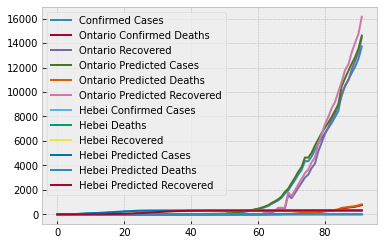

In [262]:
ab.plot()

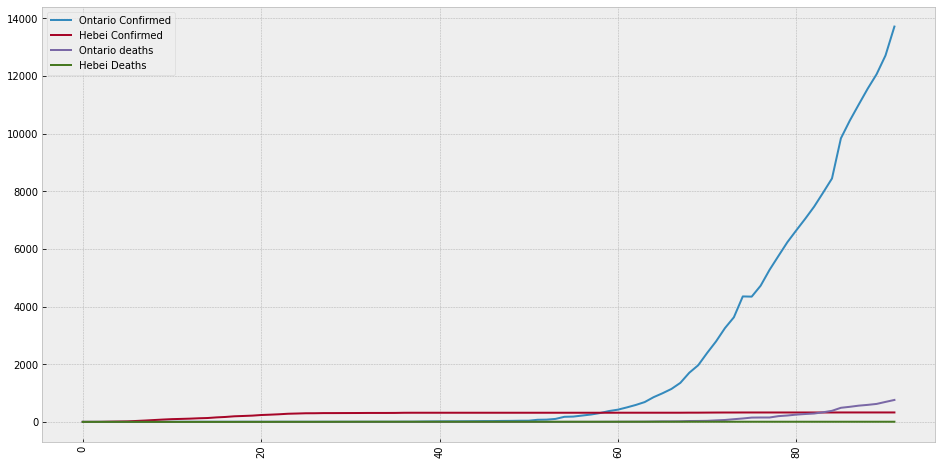

In [263]:
plt.figure(figsize=(16,8))
plt.plot(ab['Confirmed Cases'])
plt.plot(ab['Hebei Confirmed Cases'])
plt.plot(ab['Ontario Confirmed Deaths'])
plt.plot(ab['Hebei Deaths'])
plt.xticks(rotation=90)
plt.legend(['Ontario Confirmed','Hebei Confirmed','Ontario deaths','Hebei Deaths'])
plt.show()

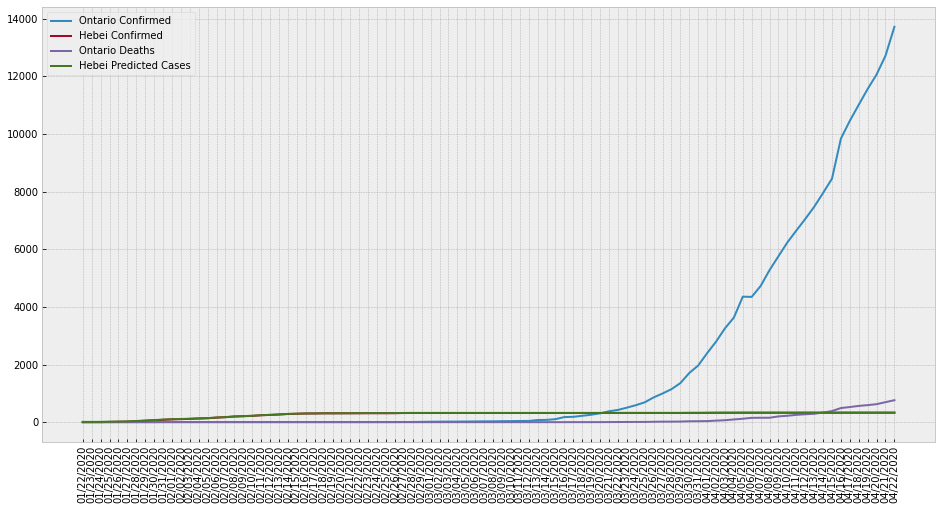

In [264]:
plt.figure(figsize=(16,8))
plt.plot(newdata['Confirmed Cases'])
plt.plot(newdata['Hebei Confirmed Cases'])
plt.plot(newdata['Ontario Confirmed Deaths'])
plt.plot(newdata['Hebei Predicted Cases'])
plt.xticks(rotation=90)
plt.legend(['Ontario Confirmed','Hebei Confirmed','Ontario Deaths','Hebei Predicted Cases'])
plt.show()

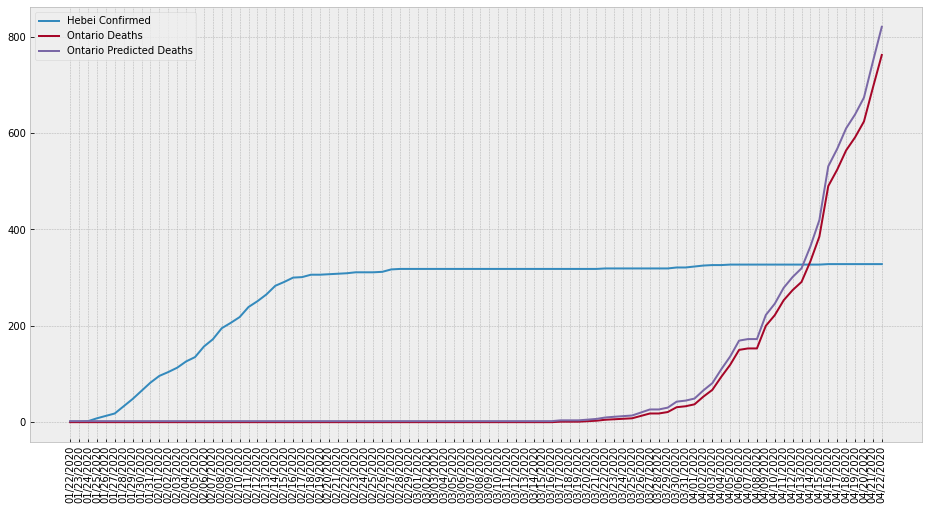

In [253]:
plt.figure(figsize=(16,8))
plt.plot(newdata['Hebei Confirmed Cases'])
plt.plot(newdata['Ontario Confirmed Deaths'])
plt.plot(newdata['Ontario Predicted Deaths'])
plt.xticks(rotation=90)
plt.legend(['Hebei Confirmed','Ontario Deaths','Ontario Predicted Deaths'])
plt.show()

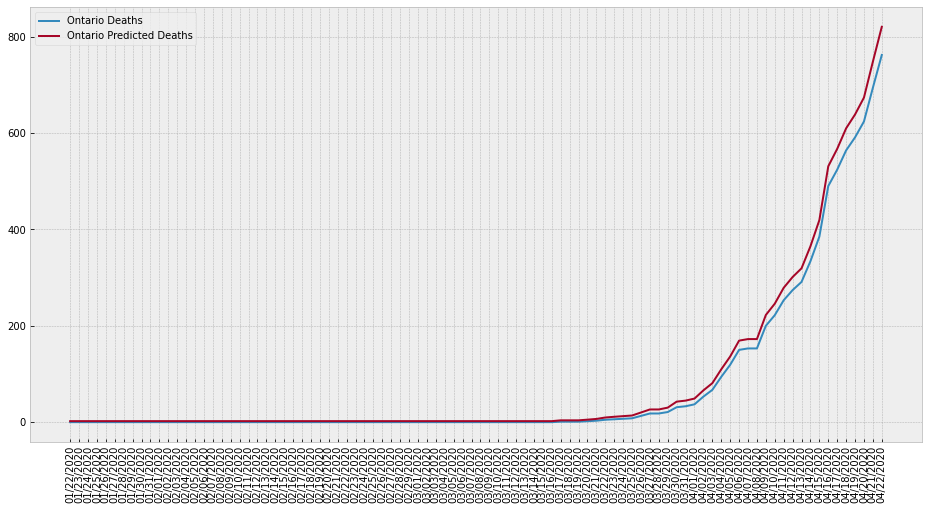

In [254]:
plt.figure(figsize=(16,8))
plt.plot(newdata['Ontario Confirmed Deaths'])
plt.plot(newdata['Ontario Predicted Deaths'])
plt.xticks(rotation=90)
plt.legend(['Ontario Deaths','Ontario Predicted Deaths'])
plt.show()

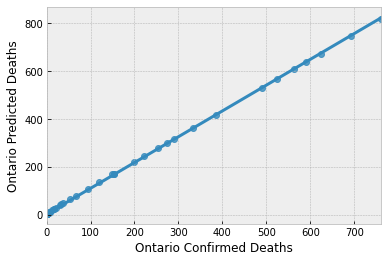

In [255]:
import seaborn as sns
sns.regplot(newdata['Ontario Confirmed Deaths'],newdata['Ontario Predicted Deaths'])


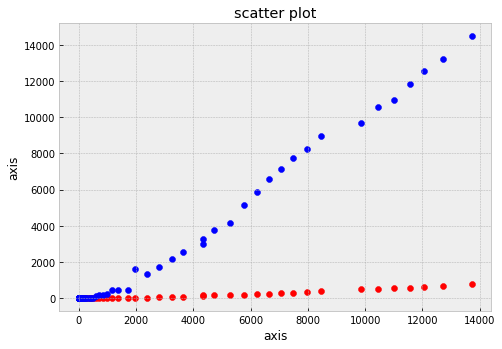

In [256]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(newdata['Confirmed Cases'], newdata['Ontario Confirmed Deaths'], color='r')
ax.scatter(newdata['Confirmed Cases'], newdata['Ontario Recovered'], color='b')
ax.set_xlabel('axis')
ax.set_ylabel('axis')
ax.set_title('scatter plot')
plt.show()

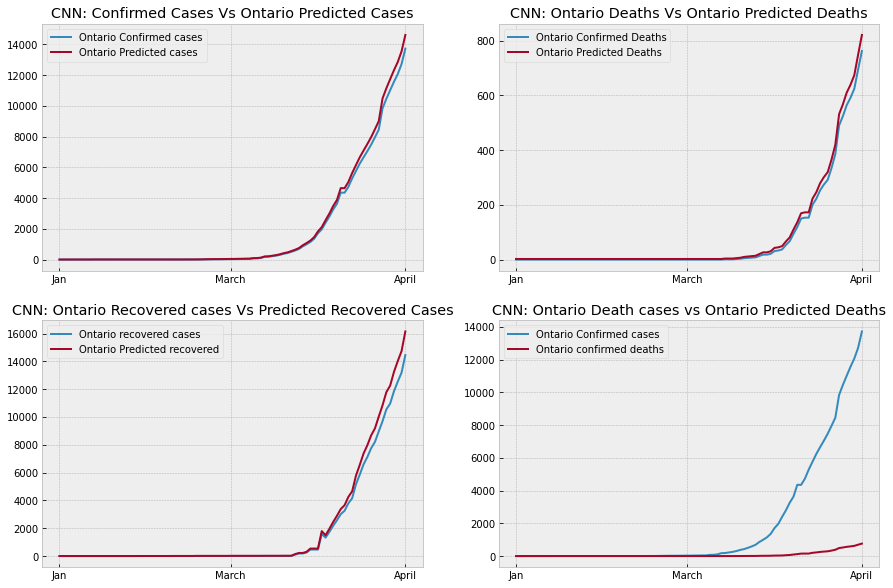

In [276]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(2,2,figsize=(15,10))
#plt.xticks([1,2,3], [1,2,3], [1,2,3], [1,2,3]) #['jan', 'March', 'April'], ['jan', 'March', 'April'], ['jan', 'March', 'April'])
plt.setp(a, xticks=[0, 45, 91], xticklabels=['Jan', 'March', 'April'])

a[0][0].plot(ab['Confirmed Cases']) 
a[0][0].plot(ab['Ontario Predicted Cases'])
a[0][0].legend(['Ontario Confirmed cases','Ontario Predicted cases'], loc='upper left')
a[0][0].set_title('CNN: Confirmed Cases Vs Ontario Predicted Cases')
a[0][1].plot(ab['Ontario Confirmed Deaths'])
a[0][1].plot(ab['Ontario Predicted Deaths'])
a[0][1].legend(['Ontario Confirmed Deaths','Ontario Predicted Deaths'], loc='upper left')
a[0][1].set_title('CNN: Ontario Deaths Vs Ontario Predicted Deaths')
a[1][0].plot(ab['Ontario Recovered'])
a[1][0].plot(ab['Ontario Predicted Recovered'])
a[1][0].legend(['Ontario recovered cases','Ontario Predicted recovered'], loc='upper left')
a[1][0].set_title('CNN: Ontario Recovered cases Vs Predicted Recovered Cases')
a[1][1].plot(ab['Confirmed Cases'])
a[1][1].plot(ab['Ontario Confirmed Deaths'])
a[1][1].legend(['Ontario Confirmed cases','Ontario confirmed deaths'], loc='upper left')
a[1][1].set_title('CNN: Ontario Death cases vs Ontario Predicted Deaths')

plt.savefig('/content/drive/My Drive/comp_plots/ONTARIOgrid_cnn.png', dpi=1200)


'for a in a.flat:\n  a.set_xticks(newdata.values)'

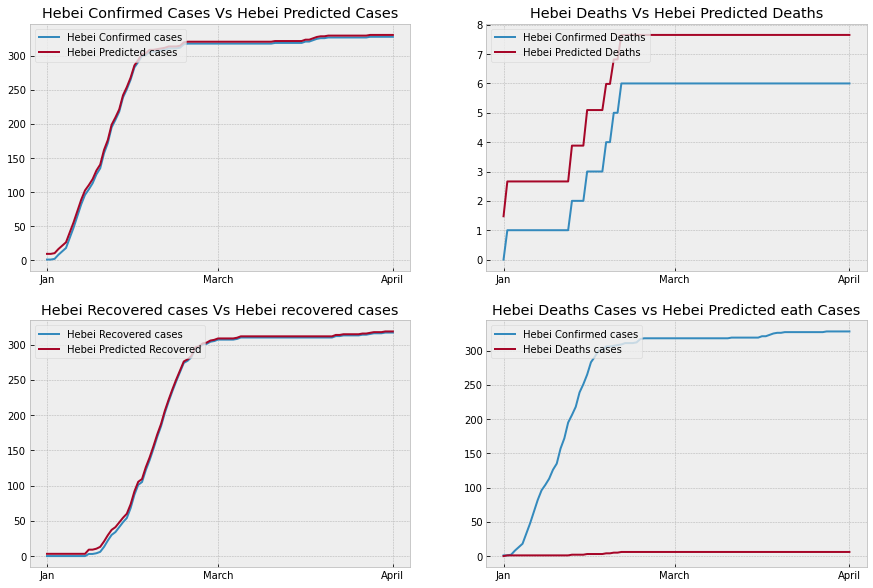

In [278]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(2,2,figsize=(15,10))
plt.setp(a, xticks=[0, 45, 91], xticklabels=['Jan', 'March', 'April'])


a[0][0].plot(ab['Hebei Confirmed Cases']) 
a[0][0].plot(ab['Hebei Predicted Cases'])
a[0][0].legend(['Hebei Confirmed cases','Hebei Predicted cases'], loc='upper left')
a[0][0].set_title('Hebei Confirmed Cases Vs Hebei Predicted Cases')
a[0][1].plot(ab['Hebei Deaths'])
a[0][1].plot(ab['Hebei Predicted Deaths'])
a[0][1].legend(['Hebei Confirmed Deaths','Hebei Predicted Deaths'], loc='upper left')
a[0][1].set_title('Hebei Deaths Vs Hebei Predicted Deaths')
a[1][0].plot(ab['Hebei Recovered'])
a[1][0].plot(ab['Hebei Predicted Recovered'])
a[1][0].legend(['Hebei Recovered cases','Hebei Predicted Recovered'], loc='upper left')
a[1][0].set_title('Hebei Recovered cases Vs Hebei recovered cases')
a[1][1].plot(ab['Hebei Confirmed Cases'])
a[1][1].plot(ab['Hebei Deaths'])
a[1][1].legend(['Hebei Confirmed cases','Hebei Deaths cases'], loc='upper left')
a[1][1].set_title('Hebei Deaths Cases vs Hebei Predicted eath Cases')
plt.savefig('/content/drive/My Drive/comp_plots/hebeigrid_cnn.png', dpi=1200)



'''for a in a.flat:
  a.set_xticks(newdata.values)'''

**COMPARSION OF ONTARIO AND HEBEI WITH DECISION TREE REGRESSOR - PREDICTION THEORY 2**


In [279]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [0]:
#from google.colab import files
#uploaded = files.upload()


In [0]:
df = pd.read_csv('/content/drive/My Drive/Ontario_Confirmed_Cases.csv', index_col = 'Dates')


In [0]:
df = df.rename(columns={'Confirmed Cases': 'Ontario Confirmed Cases', \
                        'Confirmed deaths': 'Ontario Deaths', \
                                  'Confirmed Recovered': 'Ontario Recovered'})

In [283]:
df.tail(19)

,Ontario Confirmed Cases,Ontario Deaths,Ontario Recovered
Dates,,,
04/04/2020,3630,94,2577
04/05/2020,4354,119,3012
04/06/2020,4347,150,3256
04/07/2020,4726,153,3791
04/08/2020,5276,153,4154
04/09/2020,5759,200,5162
04/10/2020,6237,222,5855
04/11/2020,6648,253,6589
04/12/2020,7049,274,7123


In [284]:
df.shape

(92, 3)

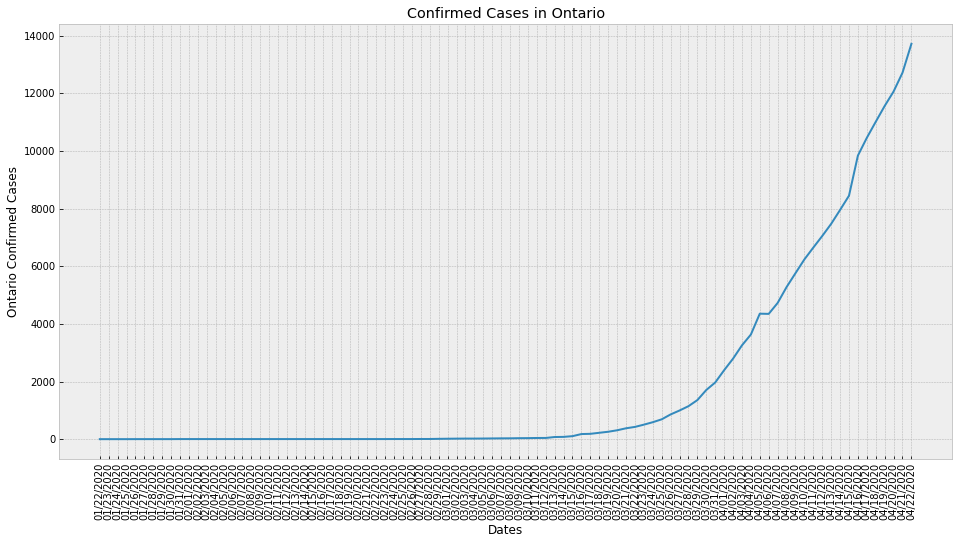

In [285]:
plt.figure(figsize=(16,8))
plt.title('Confirmed Cases in Ontario')
plt.xlabel('Dates')
plt.ylabel('Ontario Confirmed Cases')
plt.plot(df['Ontario Confirmed Cases'])
plt.xticks(rotation=90)
plt.show()

In [286]:
df = df[['Ontario Confirmed Cases']]
df.head(4)

,Ontario Confirmed Cases
Dates,
01/22/2020,0
01/23/2020,0
01/24/2020,0
01/25/2020,0


In [287]:
future_days = 25
df['Ontario Predicted Cases'] = df[['Ontario Confirmed Cases']].shift(-future_days)
df.head(4)

,Ontario Confirmed Cases,Ontario Predicted Cases
Dates,,
01/22/2020,0,3.0
01/23/2020,0,3.0
01/24/2020,0,3.0
01/25/2020,0,3.0


In [288]:
df.tail(20)

,Ontario Confirmed Cases,Ontario Predicted Cases
Dates,,
04/03/2020,3255,NaN
04/04/2020,3630,NaN
04/05/2020,4354,NaN
04/06/2020,4347,NaN
04/07/2020,4726,NaN
04/08/2020,5276,NaN
04/09/2020,5759,NaN
04/10/2020,6237,NaN
04/11/2020,6648,NaN


In [289]:
X = np.array(df.drop(['Ontario Predicted Cases'], 1))[:-future_days]
print(X)

[[   0]
 [   0]
 [   0]
 [   0]
 [   1]
 [   1]
 [   1]
 [   1]
 [   1]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   4]
 [   4]
 [   4]
 [   6]
 [   6]
 [  11]
 [  15]
 [  18]
 [  20]
 [  20]
 [  22]
 [  25]
 [  28]
 [  29]
 [  34]
 [  36]
 [  41]
 [  42]
 [  74]
 [  79]
 [ 104]
 [ 177]
 [ 185]
 [ 221]
 [ 257]
 [ 308]
 [ 377]
 [ 425]
 [ 503]
 [ 588]
 [ 688]
 [ 858]
 [ 994]
 [1144]]


In [290]:
y = np.array(df['Ontario Predicted Cases'])[:-future_days]
print(y)

[3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00
 3.0000e+00 3.0000e+00 4.0000e+00 4.0000e+00 4.0000e+00 6.0000e+00
 6.0000e+00 1.1000e+01 1.5000e+01 1.8000e+01 2.0000e+01 2.0000e+01
 2.2000e+01 2.5000e+01 2.8000e+01 2.9000e+01 3.4000e+01 3.6000e+01
 4.1000e+01 4.2000e+01 7.4000e+01 7.9000e+01 1.0400e+02 1.7700e+02
 1.8500e+02 2.2100e+02 2.5700e+02 3.0800e+02 3.7700e+02 4.2500e+02
 5.0300e+02 5.8800e+02 6.8800e+02 8.5800e+02 9.9400e+02 1.1440e+03
 1.3550e+03 1.7060e+03 1.9660e+03 2.3920e+03 2.7930e+03 3.2550e+03
 3.6300e+03 4.3540e+03 4.3470e+03 4.7260e+03 5.2760e+03 5.7590e+03
 6.2370e+03 6.6480e+03 7.0490e+03 7.4700e+03 7.9530e+03 8.4470e+03
 9.8400e+03 1.0456e+04 1.1013e+04 1.1561e+04 1.2063e+04 1.2715e+04
 1.3718e+04]


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [0]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [293]:
x_future = df.drop(['Ontario Predicted Cases'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[  20],
       [  22],
       [  25],
       [  28],
       [  29],
       [  34],
       [  36],
       [  41],
       [  42],
       [  74],
       [  79],
       [ 104],
       [ 177],
       [ 185],
       [ 221],
       [ 257],
       [ 308],
       [ 377],
       [ 425],
       [ 503],
       [ 588],
       [ 688],
       [ 858],
       [ 994],
       [1144]])

In [294]:
tree_predictions = tree.predict(x_future)
print(tree_predictions)
print()
lr_predictions = lr.predict(x_future)
print(lr_predictions)

[ 1249.5  1706.   1966.   2793.   2793.   3255.   3630.   4354.   4347.
  5276.   5276.   5759.   6648.   6648.   7049.   7049.   7953.   8447.
  9840.  10456.  11013.  11013.  12063.  12715.  13718. ]

[ 1349.53949715  1377.58257189  1419.647184    1461.71179611
  1475.73333348  1545.84102033  1573.88409507  1643.99178192
  1658.01331929  2106.70251513  2176.81020198  2527.34863623
  3550.92086424  3663.0931632   4167.86850853  4672.64385385
  5387.74225972  6355.22833825  7028.26213201  8121.94204687
  9313.77272333 10715.92646033 13099.58781323 15006.51689556
 17109.74750106]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


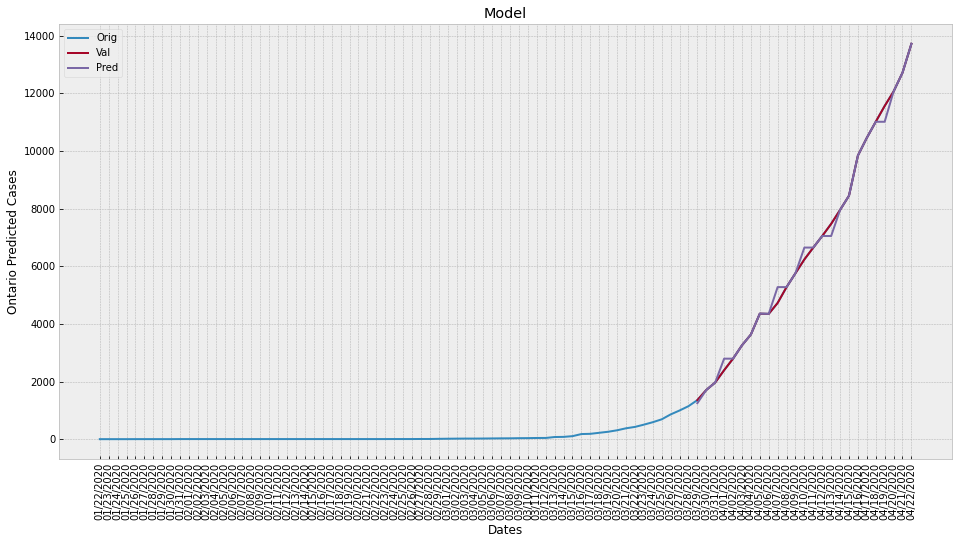

In [295]:
predictions = tree_predictions

valid = df[X.shape[0]:]
valid['Ontario Predicted Cases'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Ontario Predicted Cases')
plt.plot(df['Ontario Confirmed Cases'])
plt.plot(valid['Ontario Confirmed Cases'])
plt.plot(valid['Ontario Predicted Cases'])
plt.xticks(rotation=90)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [296]:
valid

,Ontario Confirmed Cases,Ontario Predicted Cases
Dates,,
03/29/2020,1355,1249.5
03/30/2020,1706,1706.0
03/31/2020,1966,1966.0
04/01/2020,2392,2793.0
04/02/2020,2793,2793.0
04/03/2020,3255,3255.0
04/04/2020,3630,3630.0
04/05/2020,4354,4354.0
04/06/2020,4347,4347.0


In [297]:
from sklearn.metrics import r2_score
score = r2_score(valid['Ontario Confirmed Cases'], valid['Ontario Predicted Cases'])
print(score)

0.9966521319871254


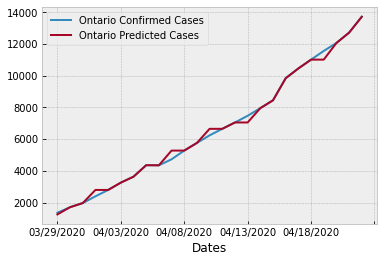

In [298]:
valid.plot()

In [0]:
df2= pd.read_csv('/content/drive/My Drive/Ontario_Confirmed_Cases.csv', index_col = 'Dates')


In [0]:
df2 = df2.rename(columns={'Confirmed Cases': 'Ontario Confirmed Cases', \
                        'Confirmed deaths': 'Ontario Deaths', \
                                  'Confirmed Recovered': 'Ontario Recovered'})

In [301]:
df2.head(4)

,Ontario Confirmed Cases,Ontario Deaths,Ontario Recovered
Dates,,,
01/22/2020,0,0,0
01/23/2020,0,0,0
01/24/2020,0,0,0
01/25/2020,0,0,0


In [0]:
df2 = df2[['Ontario Deaths']]

In [303]:
df2.head()

,Ontario Deaths
Dates,
01/22/2020,0
01/23/2020,0
01/24/2020,0
01/25/2020,0
01/26/2020,0


In [304]:
future_days_deaths = 25
df2['Ontario Predicted Deaths'] = df2[['Ontario Deaths']].shift(-future_days_deaths)
df2.tail(4)

,Ontario Deaths,Ontario Predicted Deaths
Dates,,
04/19/2020,591,NaN
04/20/2020,624,NaN
04/21/2020,694,NaN
04/22/2020,762,NaN


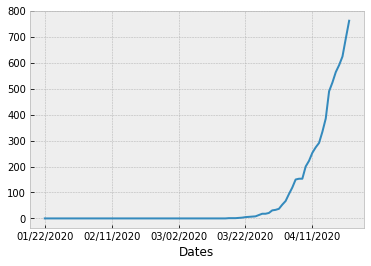

In [305]:
df2['Ontario Deaths'].plot()

In [306]:
X1 = np.array(df2.drop(['Ontario Predicted Deaths'], 1))[:-future_days_deaths]
print(X1)

[[ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 3]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [13]
 [18]
 [18]]


In [307]:
y1 = np.array(df2['Ontario Predicted Deaths'])[:-future_days_deaths]
print(y1)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   1.   1.   1.   2.   3.   5.   6.   7.   8.  13.  18.  18.
  21.  31.  33.  37.  53.  67.  94. 119. 150. 153. 153. 200. 222. 253.
 274. 291. 334. 385. 490. 524. 564. 591. 624. 694. 762.]


In [0]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size = 0.25)


In [0]:
tree2 = DecisionTreeRegressor().fit(x_train2, y_train2)
lr2 = LinearRegression().fit(x_train2, y_train2)

In [310]:
x_future2 = df2.drop(['Ontario Predicted Deaths'], 1)[:-future_days_deaths]
x_future2 = x_future2.tail(future_days_deaths)
x_future2 = np.array(x_future2)
x_future2

array([[ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 3],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [13],
       [18],
       [18]])

In [311]:
tree_predictions2 = tree2.predict(x_future2)
print(tree_predictions2)
print()
lr_predictions2 = lr2.predict(x_future2)
print(lr_predictions2)

[ 24.6         24.6         24.6         24.6         24.6
  24.6         24.6         24.6         24.6         24.6
  24.6         24.6         24.6        272.66666667 272.66666667
 272.66666667 272.66666667 385.         490.         524.
 564.         591.         624.         694.         694.        ]

[ 51.07518095  51.07518095  51.07518095  51.07518095  51.07518095
  51.07518095  51.07518095  51.07518095  51.07518095  51.07518095
  51.07518095  51.07518095  51.07518095 100.60281512 100.60281512
 100.60281512 150.13044928 199.65808345 298.71335179 348.24098596
 397.76862013 447.29625429 694.93442514 942.57259598 942.57259598]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


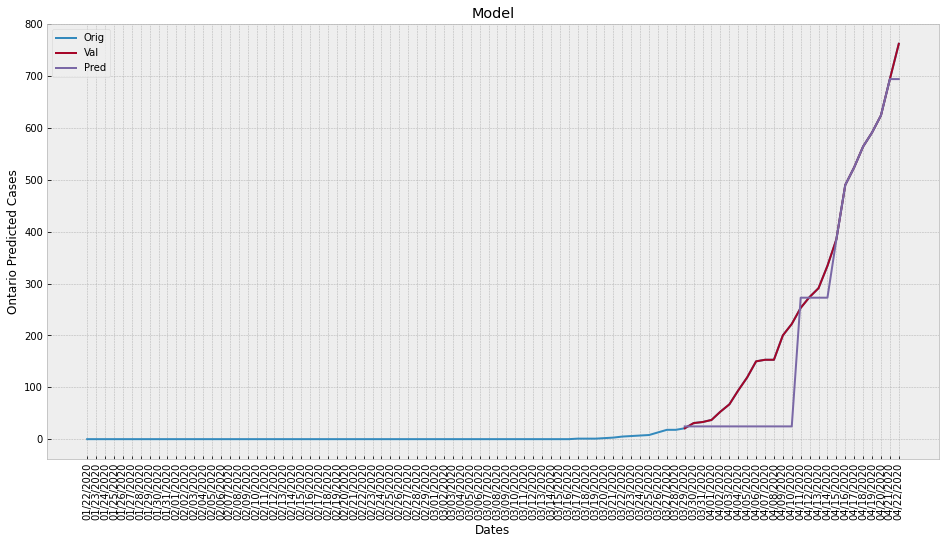

In [312]:
predictions2 = tree_predictions2

valid2 = df2[X1.shape[0]:]
valid2['Ontario Predicted Deaths'] = predictions2

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Ontario Predicted Cases')
plt.plot(df2['Ontario Deaths'])
plt.plot(valid2['Ontario Deaths'])
plt.plot(valid2['Ontario Predicted Deaths'])
plt.xticks(rotation=90)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [313]:
from sklearn.metrics import r2_score
score2 = r2_score(valid2['Ontario Deaths'], valid2['Ontario Predicted Deaths'])
print(score2)

0.8876284788842642


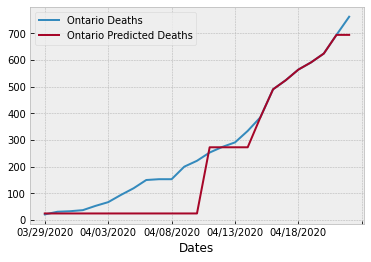

In [314]:
valid2.plot()

In [0]:
df3 = pd.read_csv("/content/drive/My Drive/Ontario_Confirmed_Cases.csv", index_col = 'Dates')

In [0]:
df3 = df3.rename(columns={'Confirmed Cases': 'Ontario Confirmed Cases', \
                        'Confirmed deaths': 'Ontario Deaths', \
                                  'Confirmed Recovered': 'Ontario Recovered'})

In [0]:
df3 = df3[['Ontario Recovered']]

In [0]:
df3.head()

In [0]:
future_days_recover = 25

In [0]:
df3['Ontario Predicted Recovered'] = df3[['Ontario Recovered']].shift(-future_days_recover)
df3.tail(4)

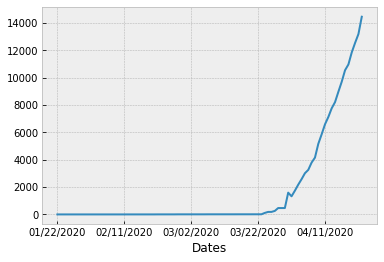

In [321]:
df3['Ontario Recovered'].plot()

In [322]:
X2 = np.array(df3.drop(['Ontario Predicted Recovered'], 1))[:-future_days_recover]
print(X2)

[[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  1]
 [  1]
 [  1]
 [  1]
 [  1]
 [  1]
 [  1]
 [  1]
 [  1]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  8]
 [  8]
 [  8]
 [  8]
 [  8]
 [  8]
 [  8]
 [  8]
 [  8]
 [  9]
 [  9]
 [  9]
 [  9]
 [  9]
 [ 10]
 [ 10]
 [ 10]
 [110]
 [183]
 [184]
 [256]
 [466]]


In [323]:
y2 = np.array(df3['Ontario Predicted Recovered'])[:-future_days_recover]
print(y2)

[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 3.0000e+00
 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 6.0000e+00
 6.0000e+00 6.0000e+00 6.0000e+00 6.0000e+00 6.0000e+00 6.0000e+00
 6.0000e+00 6.0000e+00 8.0000e+00 8.0000e+00 8.0000e+00 8.0000e+00
 8.0000e+00 8.0000e+00 8.0000e+00 8.0000e+00 8.0000e+00 9.0000e+00
 9.0000e+00 9.0000e+00 9.0000e+00 9.0000e+00 1.0000e+01 1.0000e+01
 1.0000e+01 1.1000e+02 1.8300e+02 1.8400e+02 2.5600e+02 4.6600e+02
 4.6600e+02 4.6600e+02 1.5920e+03 1.3240e+03 1.7350e+03 2.1750e+03
 2.5770e+03 3.0120e+03 3.2560e+03 3.7910e+03 4.1540e+03 5.1620e+03
 5.8550e+03 6.5890e+03 7.1230e+03 7.7580e+03 8.2100e+03 8.9660e+03
 9.6980e+03 1.0545e+04 1.0964e+04 1.1847e+04 1.2543e+04 1.3188e+04
 1.4454e+04]


In [0]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size = 0.25)


In [0]:
tree3 = DecisionTreeRegressor().fit(x_train3, y_train3)
lr3 = LinearRegression().fit(x_train3, y_train3)

In [0]:
x_future3 = df3.drop(['Ontario Predicted Recovered'], 1)[:-future_days_recover]
x_future3 = x_future3.tail(future_days_recover)
x_future3 = np.array(x_future3)
x_future3

In [327]:
tree_predictions3 = tree3.predict(x_future3)
print(tree_predictions3)
print()
lr_predictions3 = lr3.predict(x_future3)
print(lr_predictions3)

[  470.57142857   470.57142857   470.57142857  2476.33333333
  2476.33333333  2476.33333333  2476.33333333  2476.33333333
  2476.33333333  2476.33333333  2476.33333333  2476.33333333
  7420.          7420.          7420.          7420.
  7420.          9736.33333333  9736.33333333  9736.33333333
 10964.         11847.         12543.         13188.
 14454.        ]

[ 1969.28366509  1969.28366509  1969.28366509  2046.89634741
  2046.89634741  2046.89634741  2046.89634741  2046.89634741
  2046.89634741  2046.89634741  2046.89634741  2046.89634741
  2085.70268857  2085.70268857  2085.70268857  2085.70268857
  2085.70268857  2124.50902973  2124.50902973  2124.50902973
  6005.14314558  8838.00605016  8876.81239132 11670.86895473
 19820.20059803]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


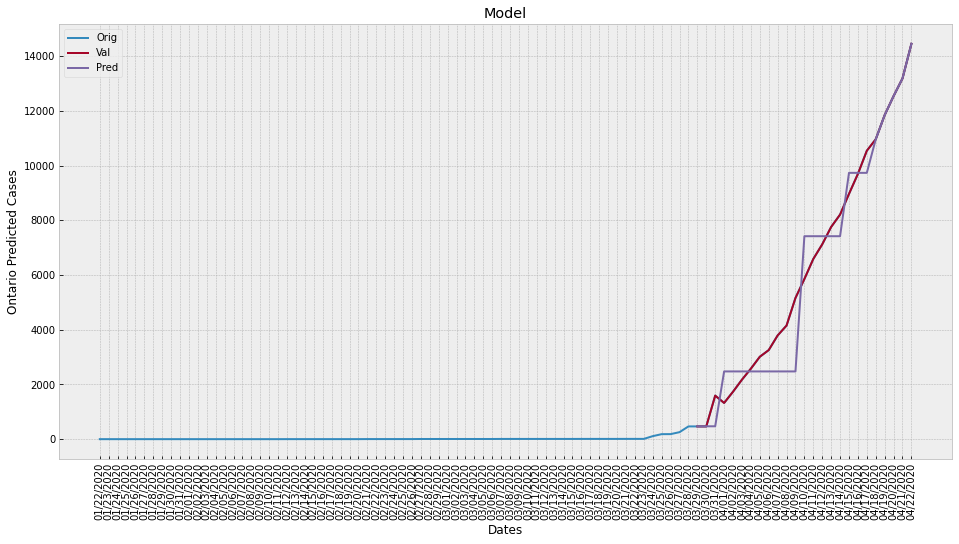

In [328]:
predictions3 = tree_predictions3

valid3 = df3[X2.shape[0]:]
valid3['Ontario Predicted Recovered'] = predictions3

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Ontario Predicted Cases')
plt.plot(df3['Ontario Recovered'])
plt.plot(valid3['Ontario Recovered'])
plt.plot(valid3['Ontario Predicted Recovered'])
plt.xticks(rotation=90)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [329]:
valid3

,Ontario Recovered,Ontario Predicted Recovered
Dates,,
03/29/2020,466,470.571429
03/30/2020,466,470.571429
03/31/2020,1592,470.571429
04/01/2020,1324,2476.333333
04/02/2020,1735,2476.333333
04/03/2020,2175,2476.333333
04/04/2020,2577,2476.333333
04/05/2020,3012,2476.333333
04/06/2020,3256,2476.333333


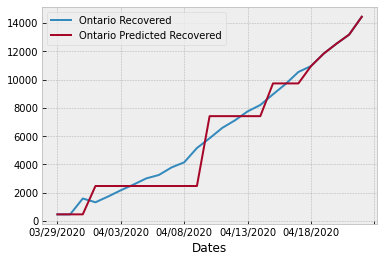

In [330]:
valid3.plot()

In [331]:
valid_final = valid.join(valid2.join(valid3))
valid_final

,Ontario Confirmed Cases,Ontario Predicted Cases,Ontario Deaths,Ontario Predicted Deaths,Ontario Recovered,Ontario Predicted Recovered
Dates,,,,,,
03/29/2020,1355,1249.5,21,24.600000,466,470.571429
03/30/2020,1706,1706.0,31,24.600000,466,470.571429
03/31/2020,1966,1966.0,33,24.600000,1592,470.571429
04/01/2020,2392,2793.0,37,24.600000,1324,2476.333333
04/02/2020,2793,2793.0,53,24.600000,1735,2476.333333
04/03/2020,3255,3255.0,67,24.600000,2175,2476.333333
04/04/2020,3630,3630.0,94,24.600000,2577,2476.333333
04/05/2020,4354,4354.0,119,24.600000,3012,2476.333333
04/06/2020,4347,4347.0,150,24.600000,3256,2476.333333


In [332]:
from sklearn.metrics import r2_score
score3 = r2_score(valid3['Ontario Recovered'], valid3['Ontario Predicted Recovered'])
print(score3)

0.9528790885494391


In [333]:
average = (score + score2 + score3) / 3
average

0.9457198998069428

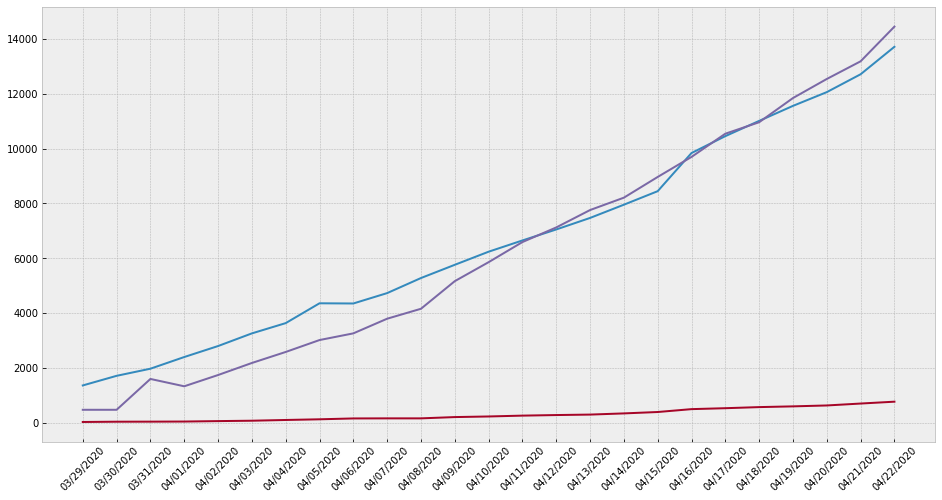

In [334]:
plt.figure(figsize=(16,8))
plt.plot(valid_final['Ontario Confirmed Cases'])
plt.plot(valid_final['Ontario Deaths'])
plt.plot(valid_final['Ontario Recovered'])
plt.xticks(rotation=45)
#plt.legend('Cases', 'Deaths', 'Recovered')
plt.show()

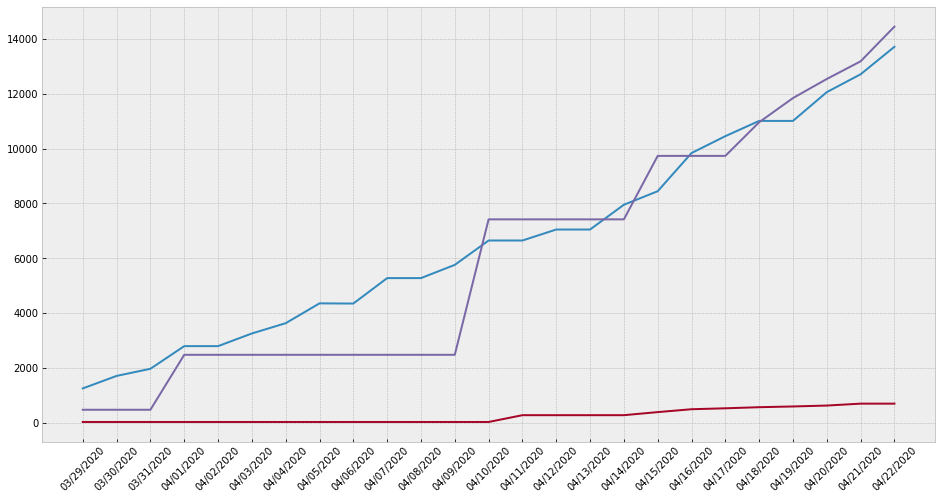

In [335]:
plt.figure(figsize=(16,8))
plt.plot(valid_final['Ontario Predicted Cases'])
plt.plot(valid_final['Ontario Predicted Deaths'])
plt.plot(valid_final['Ontario Predicted Recovered'])
plt.xticks(rotation=45)
plt.show()

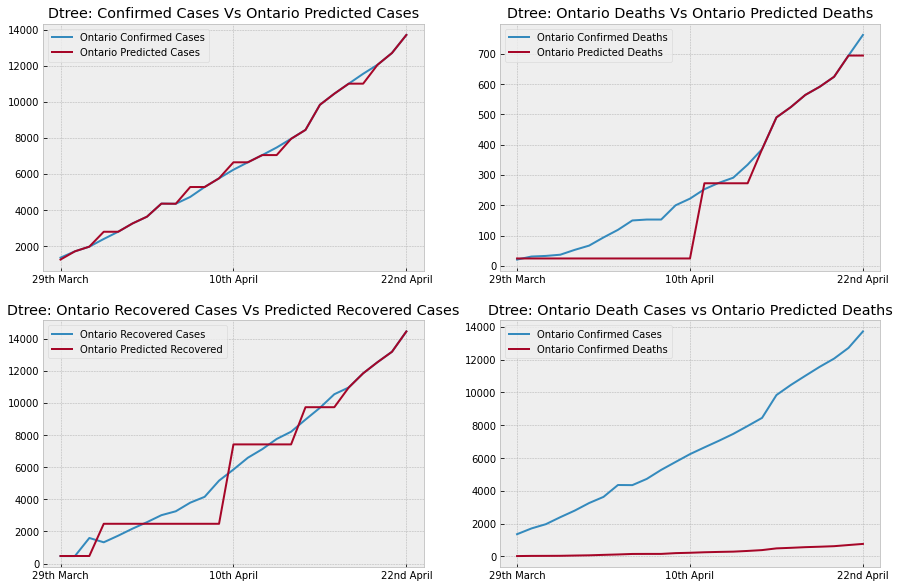

In [346]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(2,2,figsize=(15,10))
#plt.xticks([1,2,3], [1,2,3], [1,2,3], [1,2,3]) #['jan', 'March', 'April'], ['jan', 'March', 'April'], ['jan', 'March', 'April'])
plt.setp(a, xticks=[0, 12, 24], xticklabels=['29th March', '10th April', '22nd April'])

a[0][0].plot(valid_final['Ontario Confirmed Cases']) 
a[0][0].plot(valid_final['Ontario Predicted Cases'])
a[0][0].legend(['Ontario Confirmed Cases','Ontario Predicted Cases'], loc='upper left')
a[0][0].set_title('Dtree: Confirmed Cases Vs Ontario Predicted Cases')
a[0][1].plot(valid_final['Ontario Deaths'])
a[0][1].plot(valid_final['Ontario Predicted Deaths'])
a[0][1].legend(['Ontario Confirmed Deaths','Ontario Predicted Deaths'], loc='upper left')
a[0][1].set_title('Dtree: Ontario Deaths Vs Ontario Predicted Deaths')
a[1][0].plot(valid_final['Ontario Recovered'])
a[1][0].plot(valid_final['Ontario Predicted Recovered'])
a[1][0].legend(['Ontario Recovered Cases','Ontario Predicted Recovered'], loc='upper left')
a[1][0].set_title('Dtree: Ontario Recovered Cases Vs Predicted Recovered Cases')
a[1][1].plot(valid_final['Ontario Confirmed Cases'])
a[1][1].plot(valid_final['Ontario Deaths'])
a[1][1].legend(['Ontario Confirmed Cases','Ontario Confirmed Deaths'], loc='upper left')
a[1][1].set_title('Dtree: Ontario Death Cases vs Ontario Predicted Deaths')

plt.savefig('/content/drive/My Drive/comp_plots/Ontariogrid_Dtree.png', dpi=1200)


In [0]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [0]:
df = pd.read_csv('/content/drive/My Drive/new_combinedhebei (1) (1).csv', index_col = 'Dates')

In [0]:
df = df.rename(columns={'Confirmed Cases': 'Hebei Confirmed Cases', \
                        'Deaths': 'Hebei Deaths', \
                                  'Recovered': 'Hebei Recovered'})

In [350]:
df.head(4)

,Hebei Confirmed Cases,Hebei Deaths,Hebei Recovered
Dates,,,
01/22/2020,1,0,0
01/23/2020,1,1,0
01/24/2020,2,1,0
01/25/2020,8,1,0


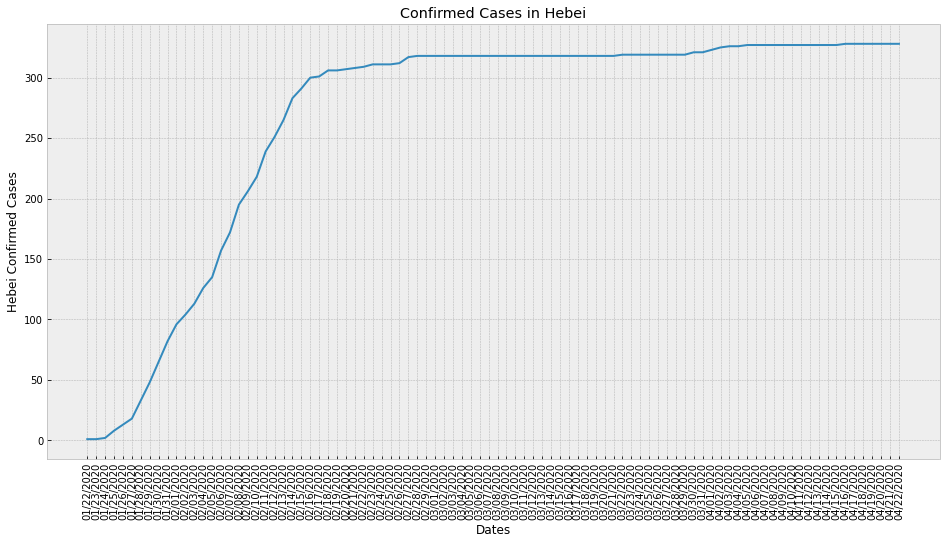

In [351]:
plt.figure(figsize=(16,8))
plt.title('Confirmed Cases in Hebei')
plt.xlabel('Dates')
plt.ylabel('Hebei Confirmed Cases')
plt.plot(df['Hebei Confirmed Cases'])
plt.xticks(rotation=90)
plt.show()

In [352]:
df = df[['Hebei Confirmed Cases']]
df.head(4)

,Hebei Confirmed Cases
Dates,
01/22/2020,1
01/23/2020,1
01/24/2020,2
01/25/2020,8


In [353]:
future_days = 25
df['Hebei Predicted Cases'] = df[['Hebei Confirmed Cases']].shift(-future_days)
df.head(4)

,Hebei Confirmed Cases,Hebei Predicted Cases
Dates,,
01/22/2020,1,300.0
01/23/2020,1,301.0
01/24/2020,2,306.0
01/25/2020,8,306.0


In [354]:
df.tail(20)

,Hebei Confirmed Cases,Hebei Predicted Cases
Dates,,
04/03/2020,326,NaN
04/04/2020,326,NaN
04/05/2020,327,NaN
04/06/2020,327,NaN
04/07/2020,327,NaN
04/08/2020,327,NaN
04/09/2020,327,NaN
04/10/2020,327,NaN
04/11/2020,327,NaN


In [355]:
X = np.array(df.drop(['Hebei Predicted Cases'], 1))[:-future_days]
print(X)

[[  1]
 [  1]
 [  2]
 [  8]
 [ 13]
 [ 18]
 [ 33]
 [ 48]
 [ 65]
 [ 82]
 [ 96]
 [104]
 [113]
 [126]
 [135]
 [157]
 [172]
 [195]
 [206]
 [218]
 [239]
 [251]
 [265]
 [283]
 [291]
 [300]
 [301]
 [306]
 [306]
 [307]
 [308]
 [309]
 [311]
 [311]
 [311]
 [312]
 [317]
 [318]
 [318]
 [318]
 [318]
 [318]
 [318]
 [318]
 [318]
 [318]
 [318]
 [318]
 [318]
 [318]
 [318]
 [318]
 [318]
 [318]
 [318]
 [318]
 [318]
 [318]
 [318]
 [318]
 [319]
 [319]
 [319]
 [319]
 [319]
 [319]
 [319]]


In [356]:
y = np.array(df['Hebei Predicted Cases'])[:-future_days]
print(y)

[300. 301. 306. 306. 307. 308. 309. 311. 311. 311. 312. 317. 318. 318.
 318. 318. 318. 318. 318. 318. 318. 318. 318. 318. 318. 318. 318. 318.
 318. 318. 318. 318. 318. 318. 318. 319. 319. 319. 319. 319. 319. 319.
 319. 321. 321. 323. 325. 326. 326. 327. 327. 327. 327. 327. 327. 327.
 327. 327. 327. 327. 328. 328. 328. 328. 328. 328. 328.]


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [0]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [359]:
x_future = df.drop(['Hebei Predicted Cases'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[318],
       [318],
       [318],
       [318],
       [318],
       [318],
       [318],
       [318],
       [318],
       [318],
       [318],
       [318],
       [318],
       [318],
       [318],
       [318],
       [318],
       [318],
       [319],
       [319],
       [319],
       [319],
       [319],
       [319],
       [319]])

In [360]:
tree_predictions = tree.predict(x_future)
print(tree_predictions)
print()
lr_predictions = lr.predict(x_future)
print(lr_predictions)

[323.63157895 323.63157895 323.63157895 323.63157895 323.63157895
 323.63157895 323.63157895 323.63157895 323.63157895 323.63157895
 323.63157895 323.63157895 323.63157895 323.63157895 323.63157895
 323.63157895 323.63157895 323.63157895 328.         328.
 328.         328.         328.         328.         328.        ]

[323.56131748 323.56131748 323.56131748 323.56131748 323.56131748
 323.56131748 323.56131748 323.56131748 323.56131748 323.56131748
 323.56131748 323.56131748 323.56131748 323.56131748 323.56131748
 323.56131748 323.56131748 323.56131748 323.61783237 323.61783237
 323.61783237 323.61783237 323.61783237 323.61783237 323.61783237]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


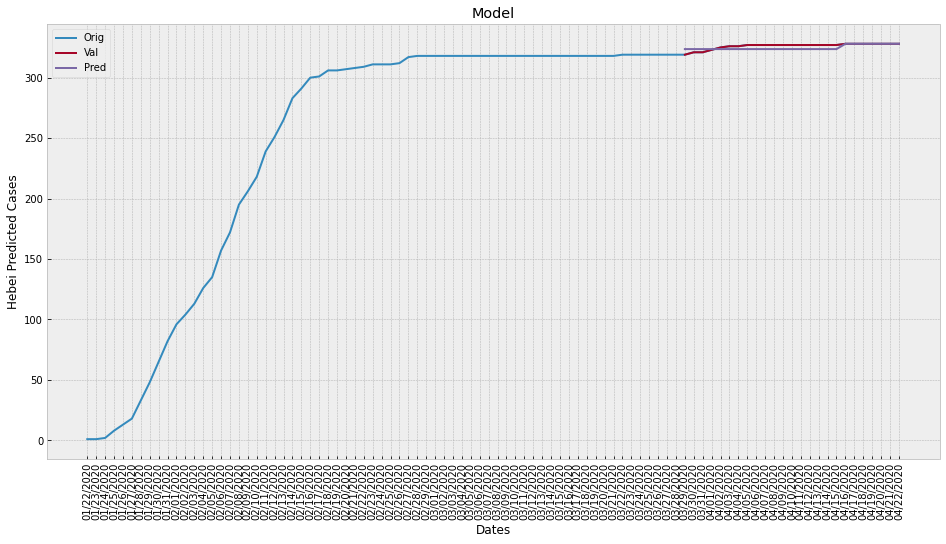

In [361]:
predictions = tree_predictions

valid = df[X.shape[0]:]
valid['Hebei Predicted Cases'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Hebei Predicted Cases')
plt.plot(df['Hebei Confirmed Cases'])
plt.plot(valid['Hebei Confirmed Cases'])
plt.plot(valid['Hebei Predicted Cases'])
plt.xticks(rotation=90)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [362]:
valid

,Hebei Confirmed Cases,Hebei Predicted Cases
Dates,,
03/29/2020,319,323.631579
03/30/2020,321,323.631579
03/31/2020,321,323.631579
04/01/2020,323,323.631579
04/02/2020,325,323.631579
04/03/2020,326,323.631579
04/04/2020,326,323.631579
04/05/2020,327,323.631579
04/06/2020,327,323.631579


In [363]:
from sklearn.metrics import r2_score
score = r2_score(valid['Hebei Confirmed Cases'], valid['Hebei Predicted Cases'])
print(score)

-0.17807483735911922


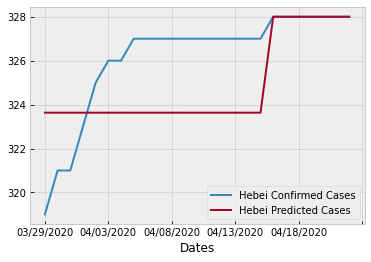

In [364]:
valid.plot()

In [0]:
df2 = pd.read_csv('/content/drive/My Drive/new_combinedhebei (1) (1).csv', index_col = 'Dates')

In [0]:
df2 = df2.rename(columns={'Confirmed Cases': 'Hebei Confirmed Cases', \
                        'Deaths': 'Hebei Deaths', \
                                  'Recovered': 'Hebei Recovered'})

In [0]:
df2.tail(19)

In [0]:
df2 = df2[['Hebei Deaths']]

In [369]:
df2.head()

,Hebei Deaths
Dates,
01/22/2020,0
01/23/2020,1
01/24/2020,1
01/25/2020,1
01/26/2020,1


In [370]:
future_days_deaths = 25
df2['Hebei Predicted Deaths'] = df2[['Hebei Deaths']].shift(-future_days_deaths)
df2.tail(4)

,Hebei Deaths,Hebei Predicted Deaths
Dates,,
04/19/2020,6,NaN
04/20/2020,6,NaN
04/21/2020,6,NaN
04/22/2020,6,NaN


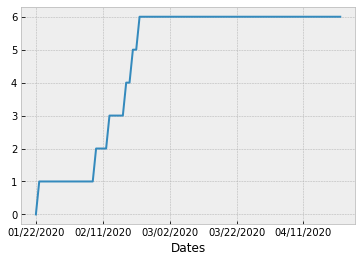

In [371]:
df2['Hebei Deaths'].plot()

In [372]:
X1 = np.array(df2.drop(['Hebei Predicted Deaths'], 1))[:-future_days_deaths]
print(X1)

[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [3]
 [4]
 [4]
 [5]
 [5]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]]


In [373]:
y1 = np.array(df2['Hebei Predicted Deaths'])[:-future_days_deaths]
print(y1)

[3. 3. 4. 4. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]


In [0]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size = 0.25)


In [0]:
tree2 = DecisionTreeRegressor().fit(x_train2, y_train2)
lr2 = LinearRegression().fit(x_train2, y_train2)

In [376]:
x_future2 = df2.drop(['Hebei Predicted Deaths'], 1)[:-future_days_deaths]
x_future2 = x_future2.tail(future_days_deaths)
x_future2 = np.array(x_future2)
x_future2

array([[6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6],
       [6]])

In [377]:
tree_predictions2 = tree2.predict(x_future2)
print(tree_predictions2)
print()
lr_predictions2 = lr2.predict(x_future2)
print(lr_predictions2)

[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6.]

[6.06346858 6.06346858 6.06346858 6.06346858 6.06346858 6.06346858
 6.06346858 6.06346858 6.06346858 6.06346858 6.06346858 6.06346858
 6.06346858 6.06346858 6.06346858 6.06346858 6.06346858 6.06346858
 6.06346858 6.06346858 6.06346858 6.06346858 6.06346858 6.06346858
 6.06346858]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


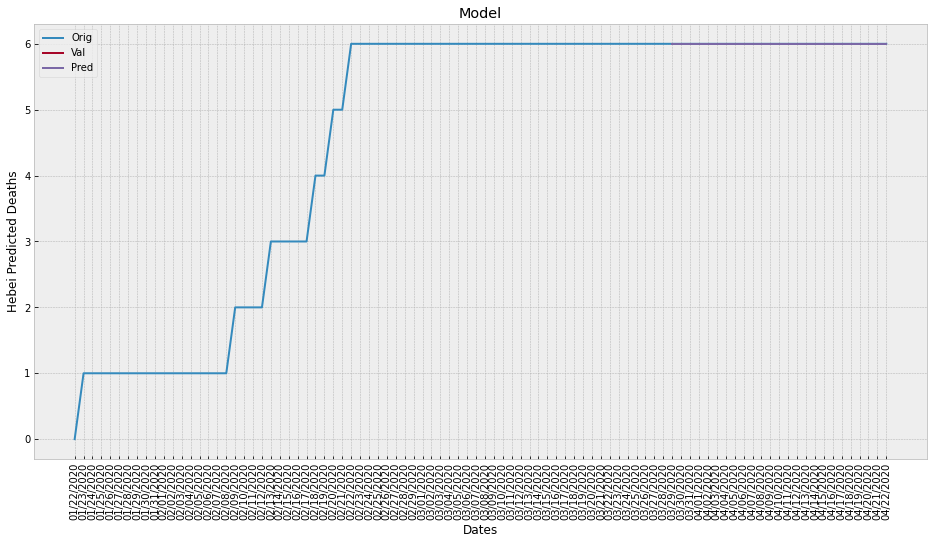

In [378]:
predictions2 = tree_predictions2

valid2 = df2[X1.shape[0]:]
valid2['Hebei Predicted Deaths'] = predictions2

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Hebei Predicted Deaths')
plt.plot(df2['Hebei Deaths'])
plt.plot(valid2['Hebei Deaths'])
plt.plot(valid2['Hebei Predicted Deaths'])
plt.xticks(rotation=90)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [379]:
from sklearn.metrics import r2_score
score2 = r2_score(valid2['Hebei Deaths'], valid2['Hebei Predicted Deaths'])
print(score2)

1.0


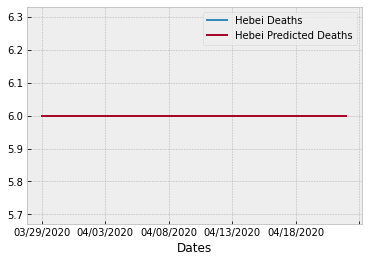

In [380]:
valid2.plot()

In [0]:
df3 = pd.read_csv('/content/drive/My Drive/new_combinedhebei (1) (1).csv', index_col = 'Dates')

In [0]:
df3 = df3.rename(columns={'Confirmed Cases': 'Hebei Confirmed Cases', \
                        'Deaths': 'Hebei Deaths', \
                                  'Recovered': 'Hebei Recovered'})

In [0]:
df3 = df3[['Hebei Recovered']]

In [384]:
df3.head()

,Hebei Recovered
Dates,
01/22/2020,0
01/23/2020,0
01/24/2020,0
01/25/2020,0
01/26/2020,0


In [0]:
future_days_recover = 25

In [386]:
df3['Hebei Predicted Recovered'] = df3[['Hebei Recovered']].shift(-future_days_recover)
df3.tail(4)

,Hebei Recovered,Hebei Predicted Recovered
Dates,,
04/19/2020,316,NaN
04/20/2020,317,NaN
04/21/2020,317,NaN
04/22/2020,317,NaN


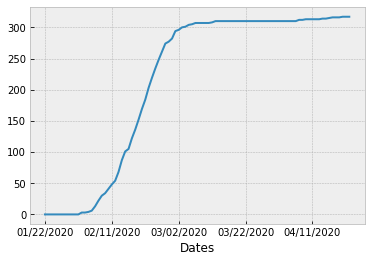

In [387]:
df3['Hebei Recovered'].plot()

In [388]:
X2 = np.array(df3.drop(['Hebei Predicted Recovered'], 1))[:-future_days_recover]
print(X2)

[[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  3]
 [  3]
 [  4]
 [  6]
 [ 13]
 [ 22]
 [ 30]
 [ 34]
 [ 41]
 [ 48]
 [ 54]
 [ 68]
 [ 87]
 [101]
 [105]
 [122]
 [136]
 [152]
 [169]
 [184]
 [203]
 [219]
 [234]
 [248]
 [261]
 [274]
 [277]
 [282]
 [294]
 [296]
 [300]
 [301]
 [304]
 [305]
 [307]
 [307]
 [307]
 [307]
 [307]
 [308]
 [310]
 [310]
 [310]
 [310]
 [310]
 [310]
 [310]
 [310]
 [310]
 [310]
 [310]
 [310]
 [310]
 [310]
 [310]
 [310]]


In [389]:
y2 = np.array(df3['Hebei Predicted Recovered'])[:-future_days_recover]
print(y2)

[105. 122. 136. 152. 169. 184. 203. 219. 234. 248. 261. 274. 277. 282.
 294. 296. 300. 301. 304. 305. 307. 307. 307. 307. 307. 308. 310. 310.
 310. 310. 310. 310. 310. 310. 310. 310. 310. 310. 310. 310. 310. 310.
 310. 310. 310. 310. 310. 310. 310. 310. 310. 312. 312. 313. 313. 313.
 313. 313. 314. 314. 315. 316. 316. 316. 317. 317. 317.]


In [0]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size = 0.25)


In [0]:
tree3 = DecisionTreeRegressor().fit(x_train3, y_train3)
lr3 = LinearRegression().fit(x_train3, y_train3)

In [392]:
x_future3 = df3.drop(['Hebei Predicted Recovered'], 1)[:-future_days_recover]
x_future3 = x_future3.tail(future_days_recover)
x_future3 = np.array(x_future3)
x_future3

array([[301],
       [304],
       [305],
       [307],
       [307],
       [307],
       [307],
       [307],
       [308],
       [310],
       [310],
       [310],
       [310],
       [310],
       [310],
       [310],
       [310],
       [310],
       [310],
       [310],
       [310],
       [310],
       [310],
       [310],
       [310]])

In [393]:
tree_predictions3 = tree3.predict(x_future3)
print(tree_predictions3)
print()
lr_predictions3 = lr3.predict(x_future3)
print(lr_predictions3)

[310.         310.         310.         310.         310.
 310.         310.         310.         310.         314.33333333
 314.33333333 314.33333333 314.33333333 314.33333333 314.33333333
 314.33333333 314.33333333 314.33333333 314.33333333 314.33333333
 314.33333333 314.33333333 314.33333333 314.33333333 314.33333333]

[317.5332373  318.27231855 318.51867897 319.0113998  319.0113998
 319.0113998  319.0113998  319.0113998  319.25776022 319.75048105
 319.75048105 319.75048105 319.75048105 319.75048105 319.75048105
 319.75048105 319.75048105 319.75048105 319.75048105 319.75048105
 319.75048105 319.75048105 319.75048105 319.75048105 319.75048105]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


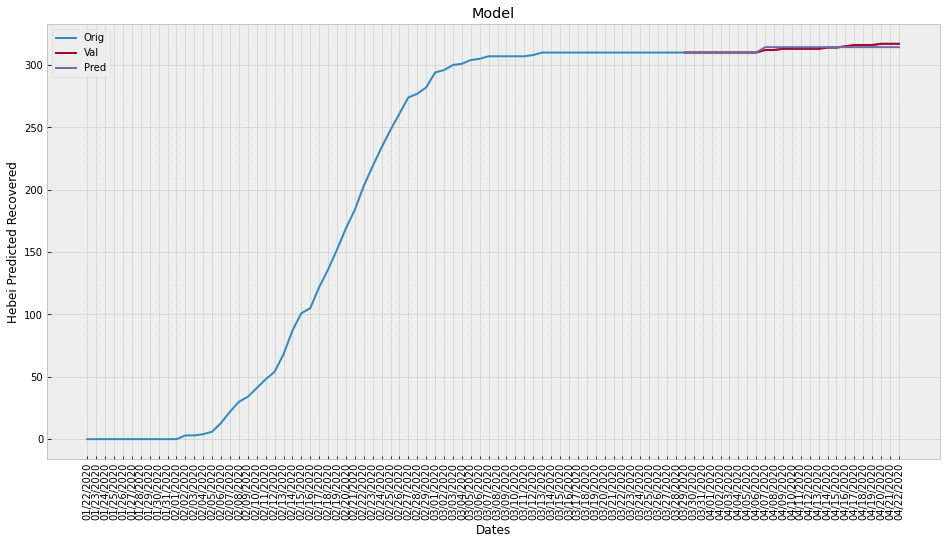

In [394]:
predictions3 = tree_predictions3

valid3 = df3[X2.shape[0]:]
valid3['Hebei Predicted Recovered'] = predictions3

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Hebei Predicted Recovered')
plt.plot(df3['Hebei Recovered'])
plt.plot(valid3['Hebei Recovered'])
plt.plot(valid3['Hebei Predicted Recovered'])
plt.xticks(rotation=90)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [395]:
valid3

,Hebei Recovered,Hebei Predicted Recovered
Dates,,
03/29/2020,310,310.000000
03/30/2020,310,310.000000
03/31/2020,310,310.000000
04/01/2020,310,310.000000
04/02/2020,310,310.000000
04/03/2020,310,310.000000
04/04/2020,310,310.000000
04/05/2020,310,310.000000
04/06/2020,310,310.000000


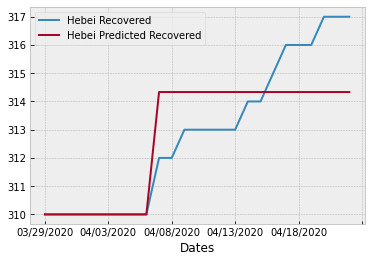

In [396]:
valid3.plot()

In [397]:
valid_final1 = valid.join(valid2.join(valid3))
valid_final1

,Hebei Confirmed Cases,Hebei Predicted Cases,Hebei Deaths,Hebei Predicted Deaths,Hebei Recovered,Hebei Predicted Recovered
Dates,,,,,,
03/29/2020,319,323.631579,6,6.0,310,310.000000
03/30/2020,321,323.631579,6,6.0,310,310.000000
03/31/2020,321,323.631579,6,6.0,310,310.000000
04/01/2020,323,323.631579,6,6.0,310,310.000000
04/02/2020,325,323.631579,6,6.0,310,310.000000
04/03/2020,326,323.631579,6,6.0,310,310.000000
04/04/2020,326,323.631579,6,6.0,310,310.000000
04/05/2020,327,323.631579,6,6.0,310,310.000000
04/06/2020,327,323.631579,6,6.0,310,310.000000


In [398]:
from sklearn.metrics import r2_score
score3 = r2_score(valid3['Hebei Recovered'], valid3['Hebei Predicted Recovered'])
print(score3)

0.6932473609750784


In [399]:
average = (score + score2 + score3) / 3
average

0.5050575078719864

In [0]:
combineddata = valid_final.join(valid_final1)

In [401]:
combineddata

,Ontario Confirmed Cases,Ontario Predicted Cases,Ontario Deaths,Ontario Predicted Deaths,Ontario Recovered,Ontario Predicted Recovered,Hebei Confirmed Cases,Hebei Predicted Cases,Hebei Deaths,Hebei Predicted Deaths,Hebei Recovered,Hebei Predicted Recovered
Dates,,,,,,,,,,,,
03/29/2020,1355,1249.5,21,24.600000,466,470.571429,319,323.631579,6,6.0,310,310.000000
03/30/2020,1706,1706.0,31,24.600000,466,470.571429,321,323.631579,6,6.0,310,310.000000
03/31/2020,1966,1966.0,33,24.600000,1592,470.571429,321,323.631579,6,6.0,310,310.000000
04/01/2020,2392,2793.0,37,24.600000,1324,2476.333333,323,323.631579,6,6.0,310,310.000000
04/02/2020,2793,2793.0,53,24.600000,1735,2476.333333,325,323.631579,6,6.0,310,310.000000
04/03/2020,3255,3255.0,67,24.600000,2175,2476.333333,326,323.631579,6,6.0,310,310.000000
04/04/2020,3630,3630.0,94,24.600000,2577,2476.333333,326,323.631579,6,6.0,310,310.000000
04/05/2020,4354,4354.0,119,24.600000,3012,2476.333333,327,323.631579,6,6.0,310,310.000000
04/06/2020,4347,4347.0,150,24.600000,3256,2476.333333,327,323.631579,6,6.0,310,310.000000


In [402]:
valid_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 03/29/2020 to 04/22/2020
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ontario Confirmed Cases      25 non-null     int64  
 1   Ontario Predicted Cases      25 non-null     float64
 2   Ontario Deaths               25 non-null     int64  
 3   Ontario Predicted Deaths     25 non-null     float64
 4   Ontario Recovered            25 non-null     int64  
 5   Ontario Predicted Recovered  25 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 2.0+ KB


In [403]:
valid_final1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 03/29/2020 to 04/22/2020
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hebei Confirmed Cases      25 non-null     int64  
 1   Hebei Predicted Cases      25 non-null     float64
 2   Hebei Deaths               25 non-null     int64  
 3   Hebei Predicted Deaths     25 non-null     float64
 4   Hebei Recovered            25 non-null     int64  
 5   Hebei Predicted Recovered  25 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 2.0+ KB


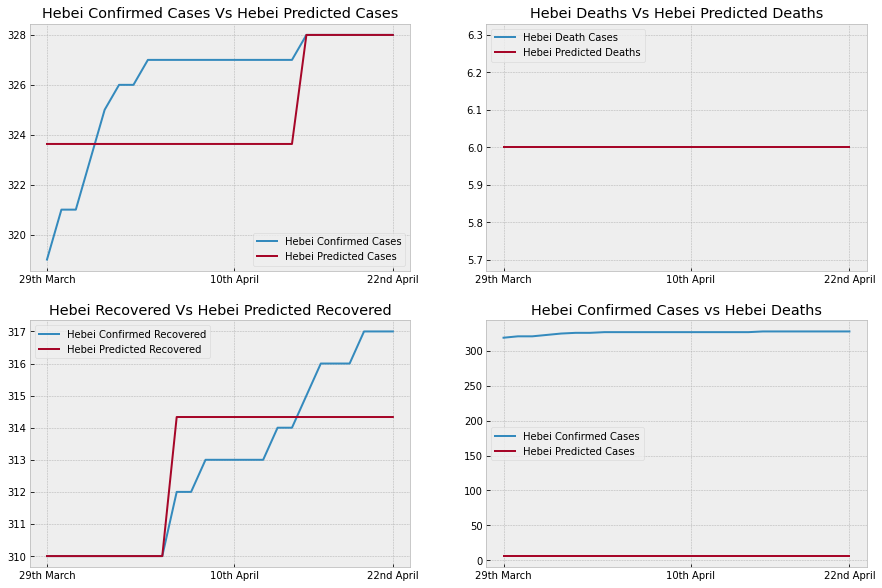

In [418]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(2,2,figsize=(15,10))
#plt.xticks([1,2,3], [1,2,3], [1,2,3], [1,2,3]) #['jan', 'March', 'April'], ['jan', 'March', 'April'], ['jan', 'March', 'April'])
plt.setp(a, xticks=[0, 13, 24], xticklabels=['29th March', '10th April', '22nd April'])

a[0][0].plot(combineddata['Hebei Confirmed Cases']) 
a[0][0].plot(combineddata['Hebei Predicted Cases'])
a[0][0].legend(['Hebei Confirmed Cases','Hebei Predicted Cases'], loc='lower right')
a[0][0].set_title('Hebei Confirmed Cases Vs Hebei Predicted Cases')
a[0][1].plot(combineddata['Hebei Deaths'])
a[0][1].plot(combineddata['Hebei Predicted Deaths'])
a[0][1].legend(['Hebei Death Cases','Hebei Predicted Deaths'], loc='upper left')
a[0][1].set_title('Hebei Deaths Vs Hebei Predicted Deaths')
a[1][0].plot(combineddata['Hebei Recovered'])
a[1][0].plot(combineddata['Hebei Predicted Recovered'])
a[1][0].legend(['Hebei Confirmed Recovered','Hebei Predicted Recovered'], loc='upper left')
a[1][0].set_title('Hebei Recovered Vs Hebei Predicted Recovered')
a[1][1].plot(combineddata['Hebei Confirmed Cases'])
a[1][1].plot(combineddata['Hebei Deaths'])
a[1][1].legend(['Hebei Confirmed Cases','Hebei Predicted Cases'], loc='center left')
a[1][1].set_title('Hebei Confirmed Cases vs Hebei Deaths')

plt.savefig('/content/drive/My Drive/comp_plots/hebei_dtree.png', dpi=1200)
